In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
input_file_actual = "weather_actual.csv"
input_file_forecast = "weather_forecast.csv"
input_data = "../utils/2026_proper_data_cleaned.csv"


df_actual = pd.read_csv(input_file_actual)
df_forecast = pd.read_csv(input_file_forecast)
df_data = pd.read_csv(input_data)

print("files loaded")


files loaded


In [5]:
df_forecast.head()

id  district_id                 time          prediction_time  temperature  \
0   1            1  2025-06-28 18:30:00  2025-06-28 00:30:22.947          0.2   
1   2            1  2025-06-28 18:45:00  2025-06-28 00:30:22.947          0.2   
2   3            1  2025-06-28 19:00:00  2025-06-28 00:30:22.947          0.2   
3   4            1  2025-06-28 19:15:00  2025-06-28 00:30:22.947          0.2   
4   5            1  2025-06-28 19:30:00  2025-06-28 00:30:22.947          0.2   

   humidity  precipitation  rain  surface_pressure  wind_speed  \
0        97            0.0   0.0            1016.9        22.3   
1        97            0.0   0.0            1016.9        22.3   
2        97            0.0   0.0            1016.9        22.3   
3        97            0.0   0.0            1017.0        22.0   
4        97            0.0   0.0            1017.0        22.0   

   wind_direction prediction_type  
0             177         morning  
1             178         morning  
2             179         morning  
3             181         morning  
4             182         morning

In [7]:
district_map = {
    1: "BALASORE",
    2: "BHADRAK",
    3: "JAJPUR",
    4: "BARIPADA",
    5: "KEONJHAR",
    6: "ANGUL",
    7: "PURI",
    8: "KHORDHA",
    9: "CUTTACK",
    10: "JAGATSINGHPUR",
    11: "KENDRAPARA",
    12: "DHENKANAL",
    13: "NAYAGARH",
    14: "JHARSUGUDA",
    15: "SAMBALPUR",
    16: "ROURKELA",
    17: "BALANGIR",
    18: "NUAPADA",
    19: "BARAGARH",
    20: "KALAHANDI",
    21: "SONEPUR",
    22: "DEOGARH",
    23: "BOUDH",
    24: "GANJAM",
    25: "KORAPUT",
    26: "RAYAGADA",
    27: "MALAKANGIRI",
    28: "PARALAKHEMUNDI",
    29: "PHULBANI",
    30: "NABARANGPUR"
}

In [9]:
# Convert to proper time series datasets
# Set time column as datetime and sort by time
df_actual['time'] = pd.to_datetime(df_actual['time'])
df_forecast['time'] = pd.to_datetime(df_forecast['time'])

# Sort by time and district_id
df_actual = df_actual.sort_values(['district_id', 'time']).reset_index(drop=True)
df_forecast = df_forecast.sort_values(['district_id', 'time']).reset_index(drop=True)

# Set multi-index for time series (district_id, time)
df_actual_ts = df_actual.set_index(['district_id', 'time']).sort_index()
df_forecast_ts = df_forecast.set_index(['district_id', 'time']).sort_index()

print("✓ Time Series Datasets Created Successfully!")
print(f"\nActual Data Shape: {df_actual_ts.shape}")
print(f"Forecast Data Shape: {df_forecast_ts.shape}")
print(f"\nActual Data Index Levels: {df_actual_ts.index.names}")
print(f"Date Range (Actual): {df_actual['time'].min()} to {df_actual['time'].max()}")
print(f"Date Range (Forecast): {df_forecast['time'].min()} to {df_forecast['time'].max()}")
print(f"\nUnique Districts in Actual: {df_actual['district_id'].nunique()}")
print(f"Unique Districts in Forecast: {df_forecast['district_id'].nunique()}")


✓ Time Series Datasets Created Successfully!

Actual Data Shape: (523973, 8)
Forecast Data Shape: (1046688, 10)

Actual Data Index Levels: ['district_id', 'time']
Date Range (Actual): 2025-06-27 13:45:00 to 2026-01-17 15:00:00
Date Range (Forecast): 2025-06-28 18:30:00 to 2026-01-17 23:45:00

Unique Districts in Actual: 30
Unique Districts in Forecast: 30


Comparing 6 weather features across 30 districts



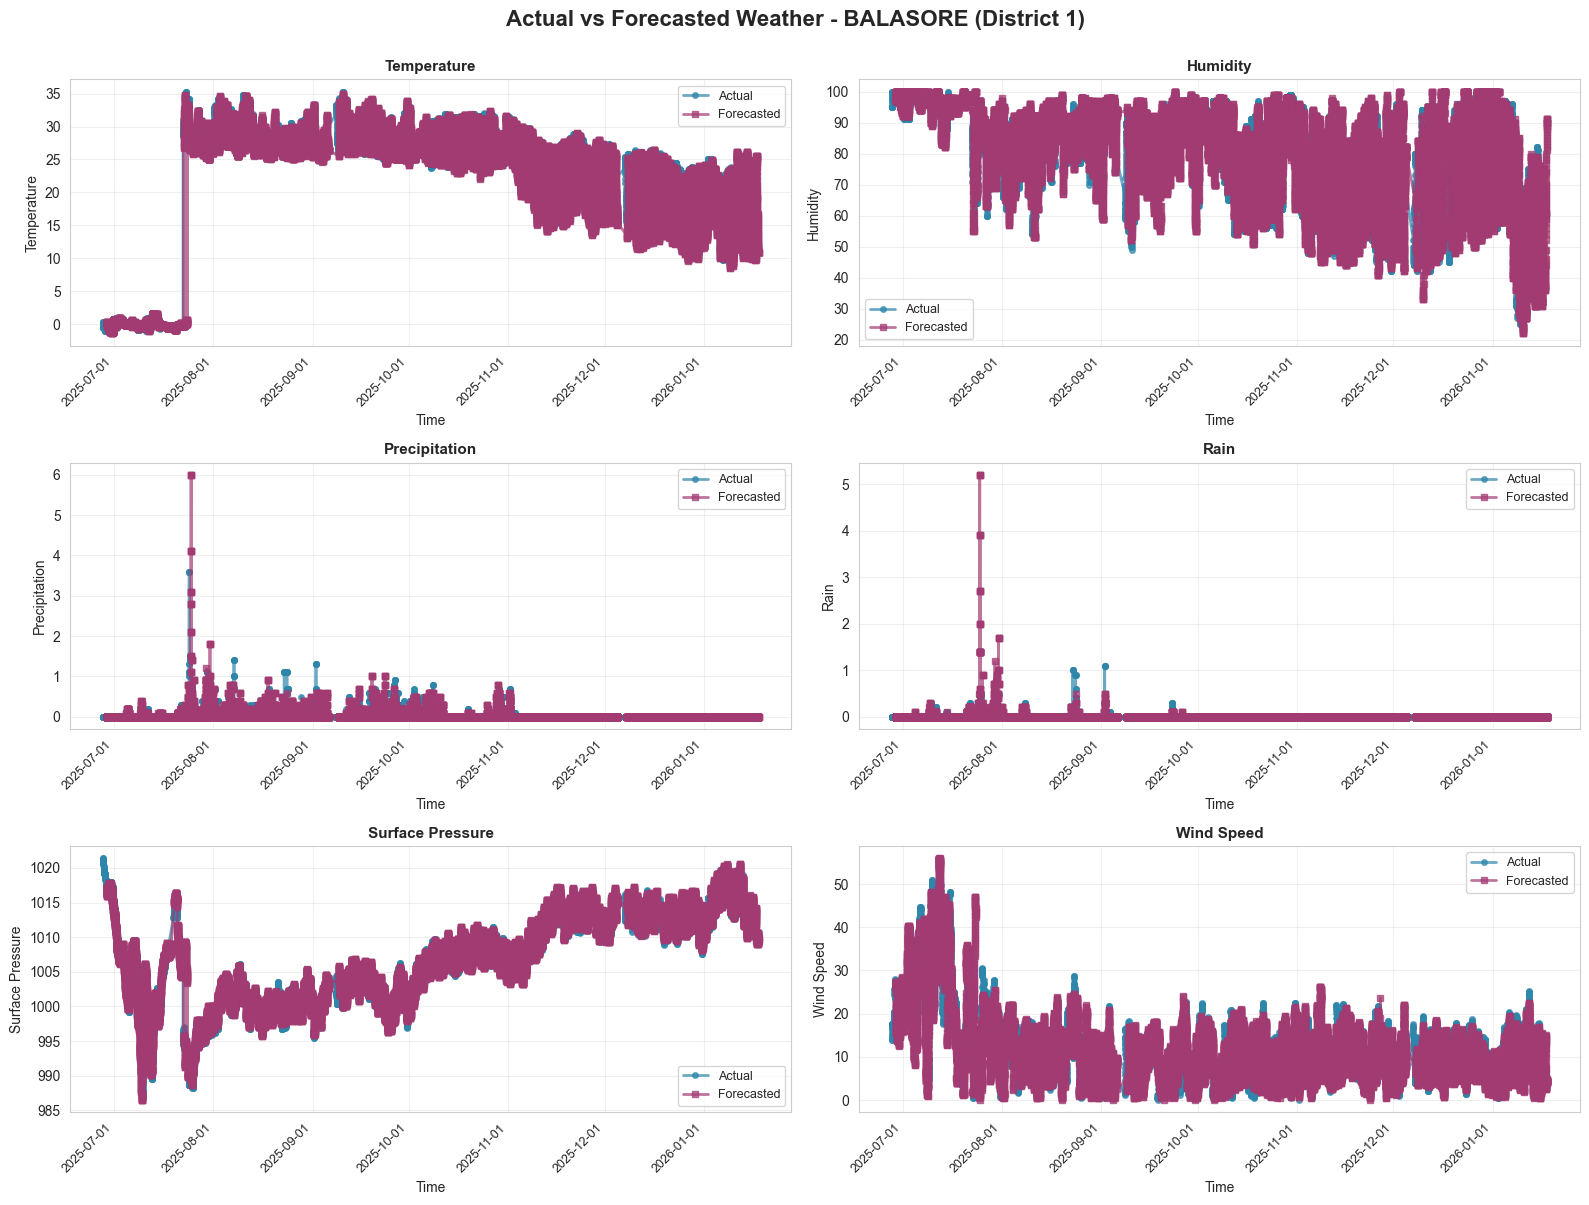

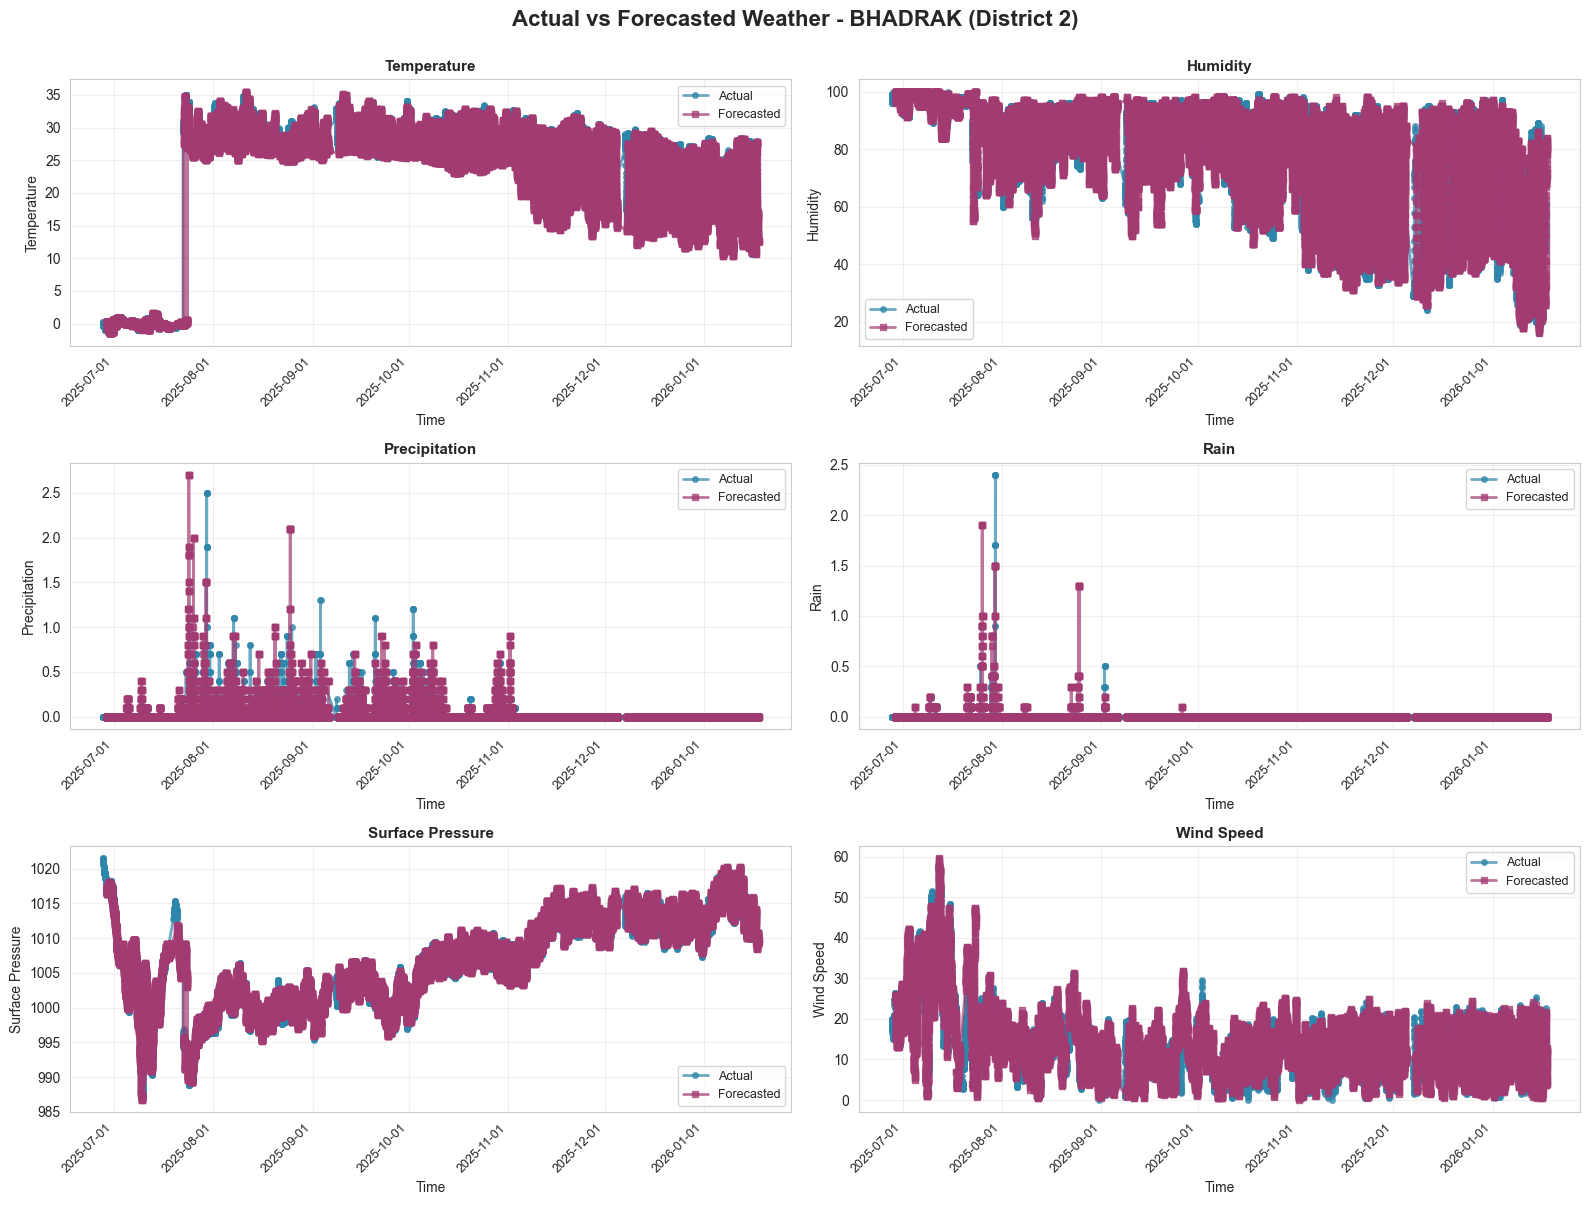

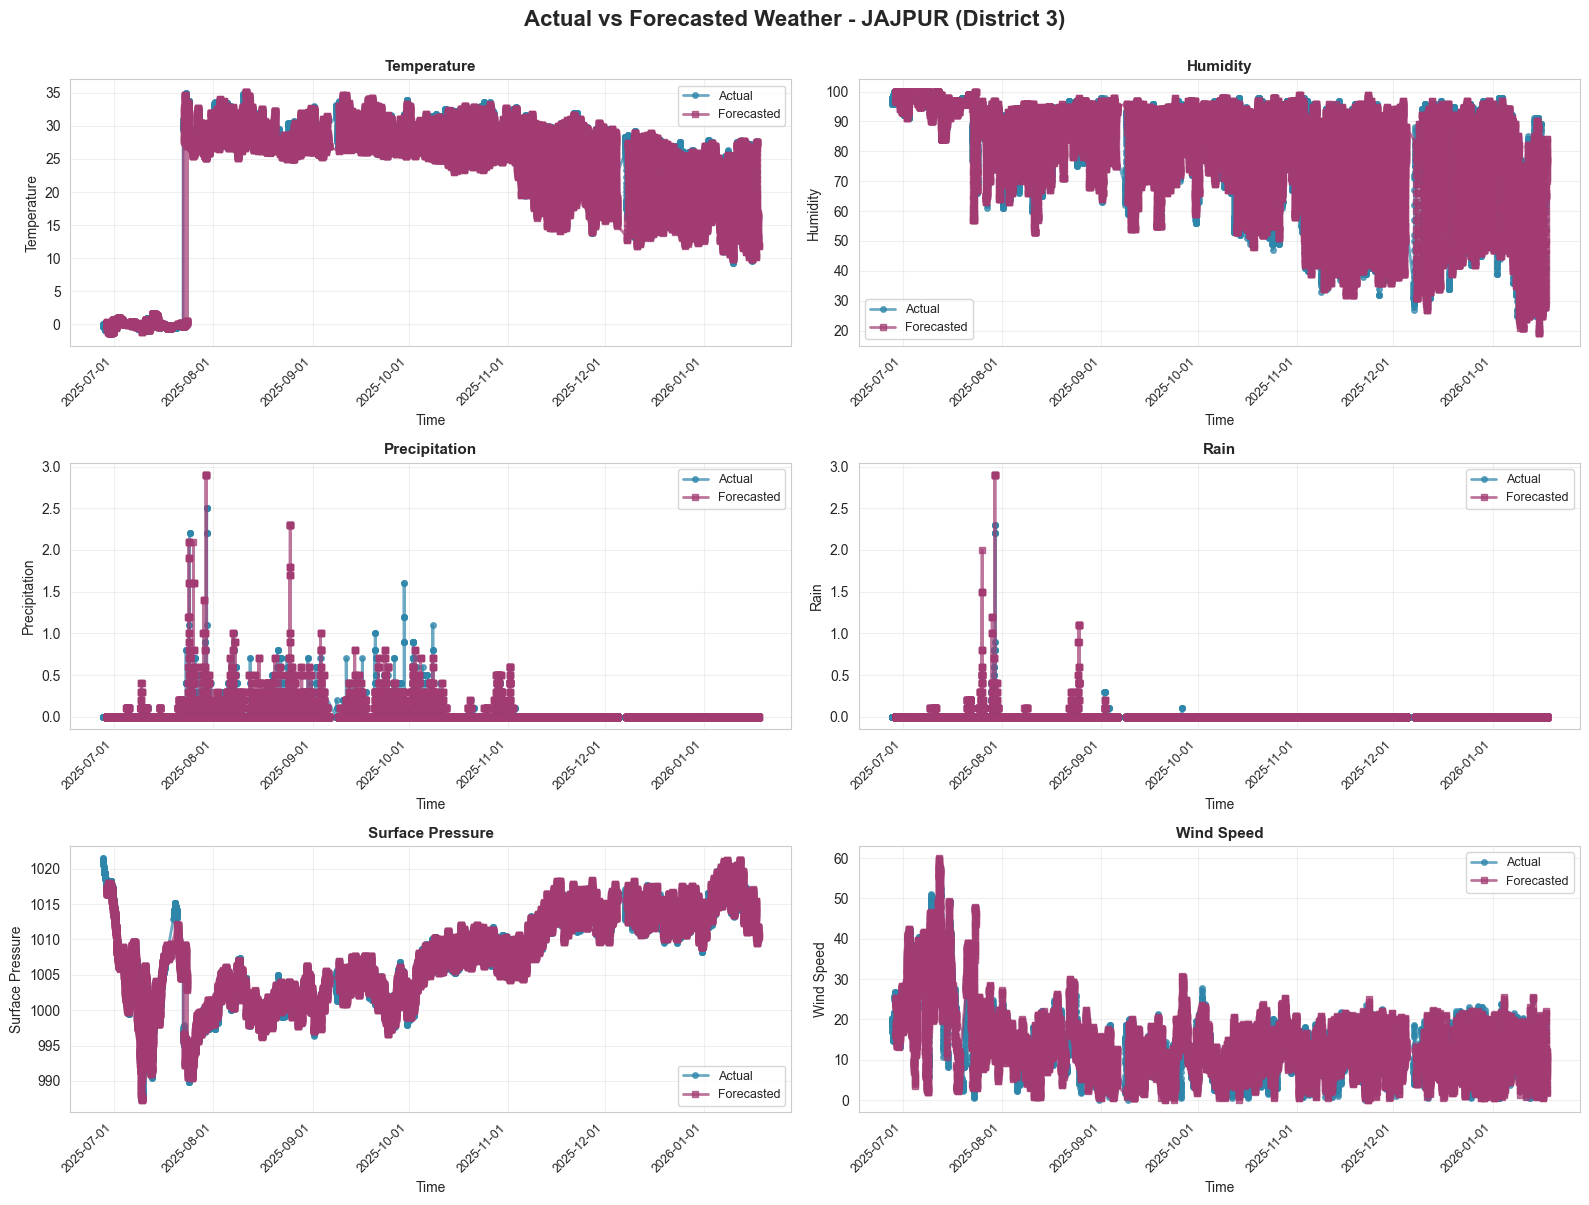

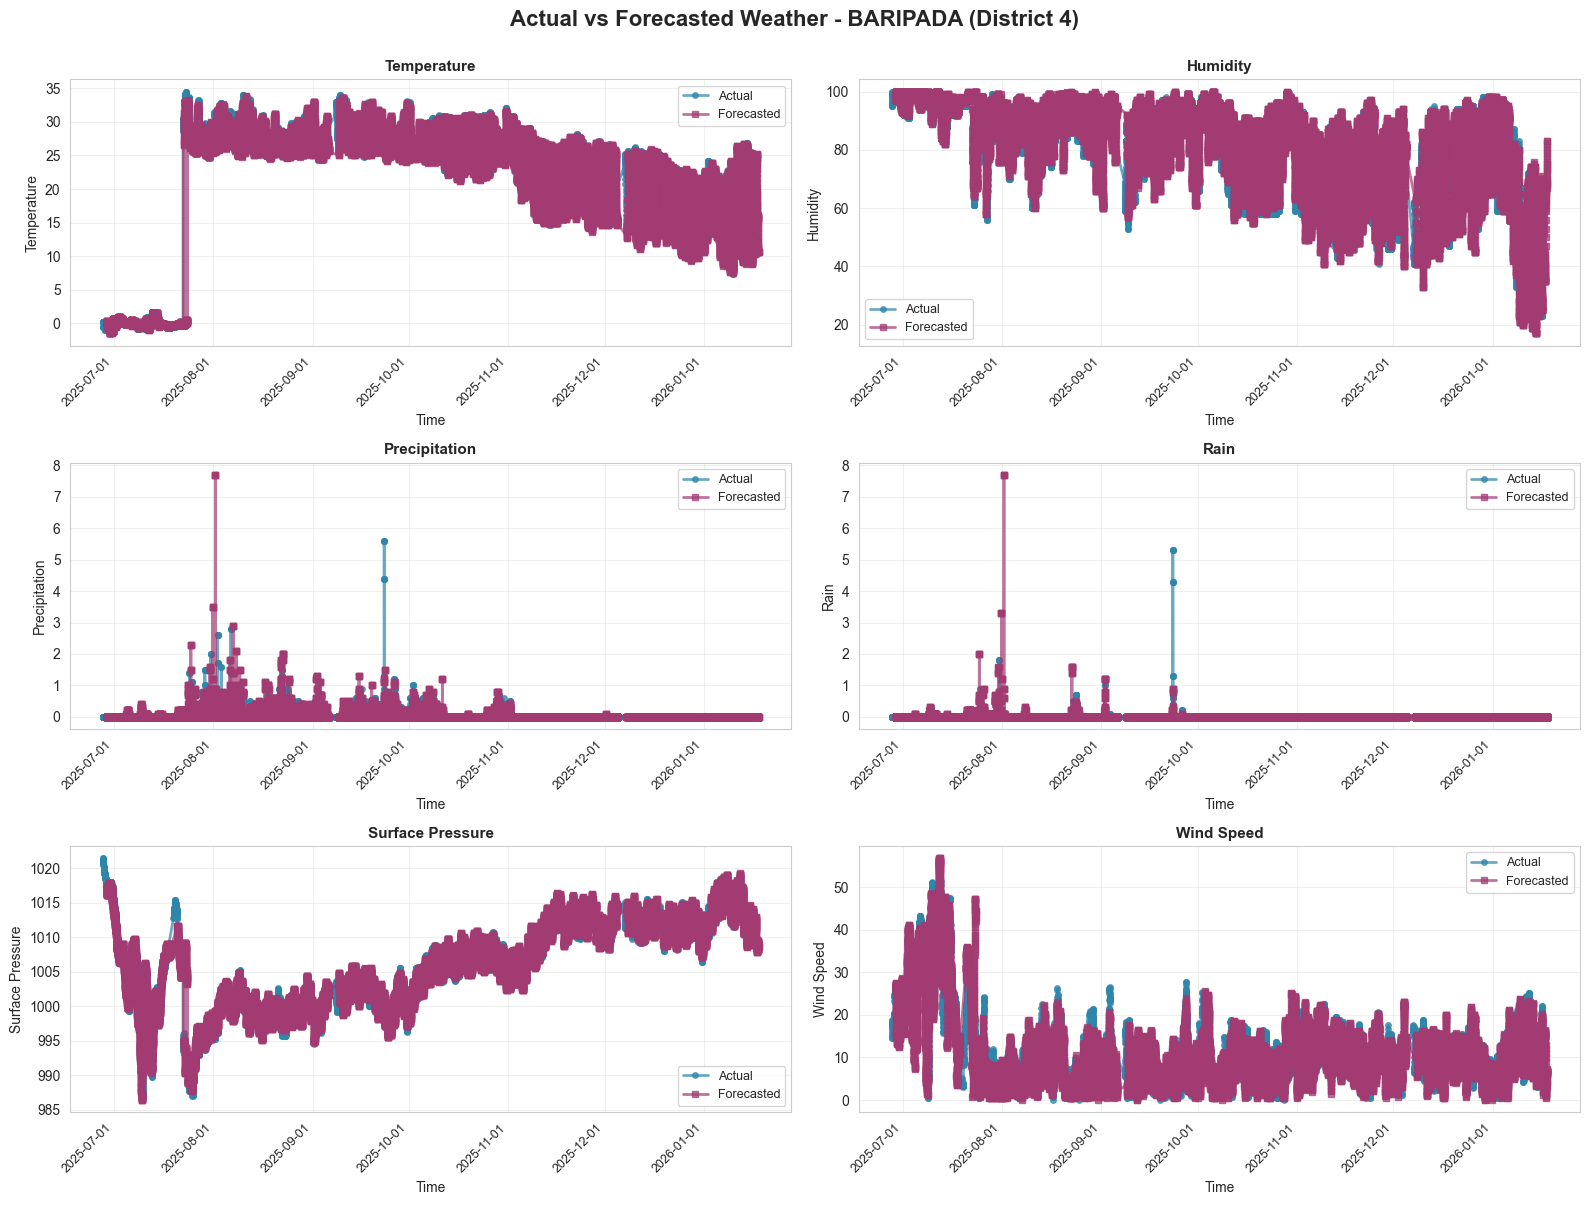

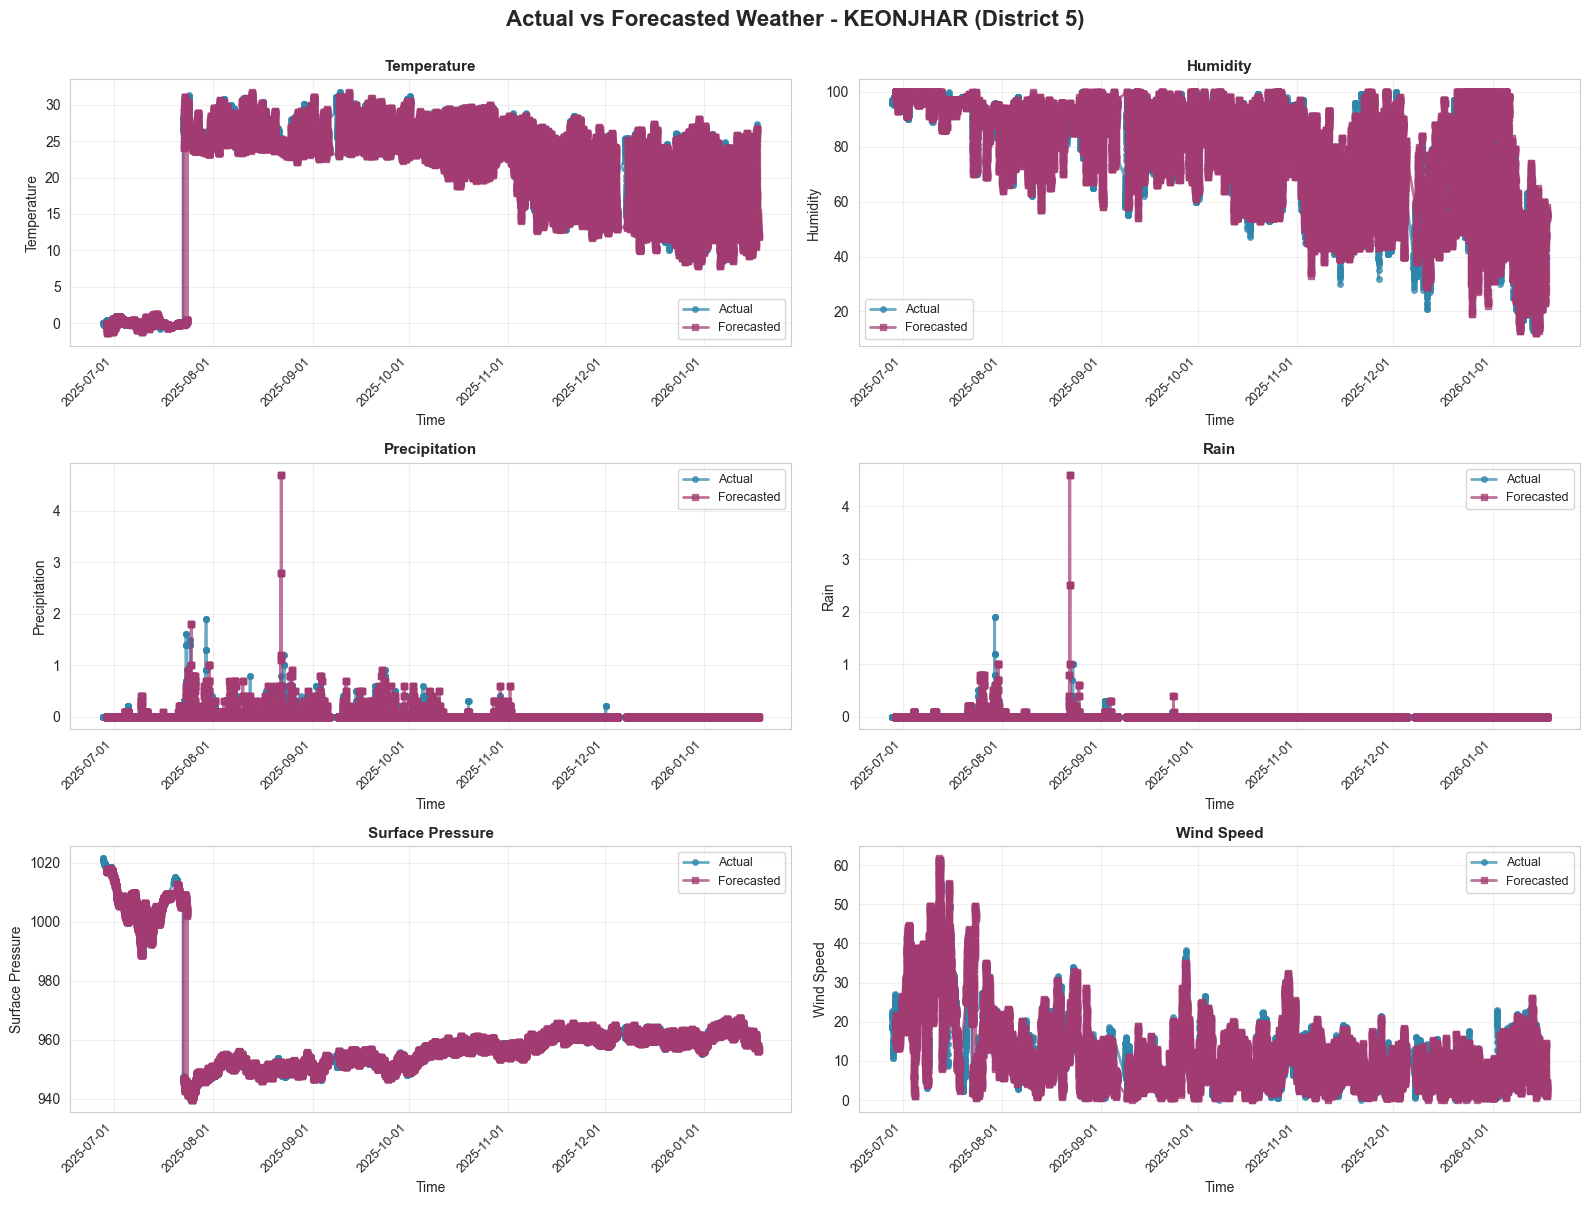

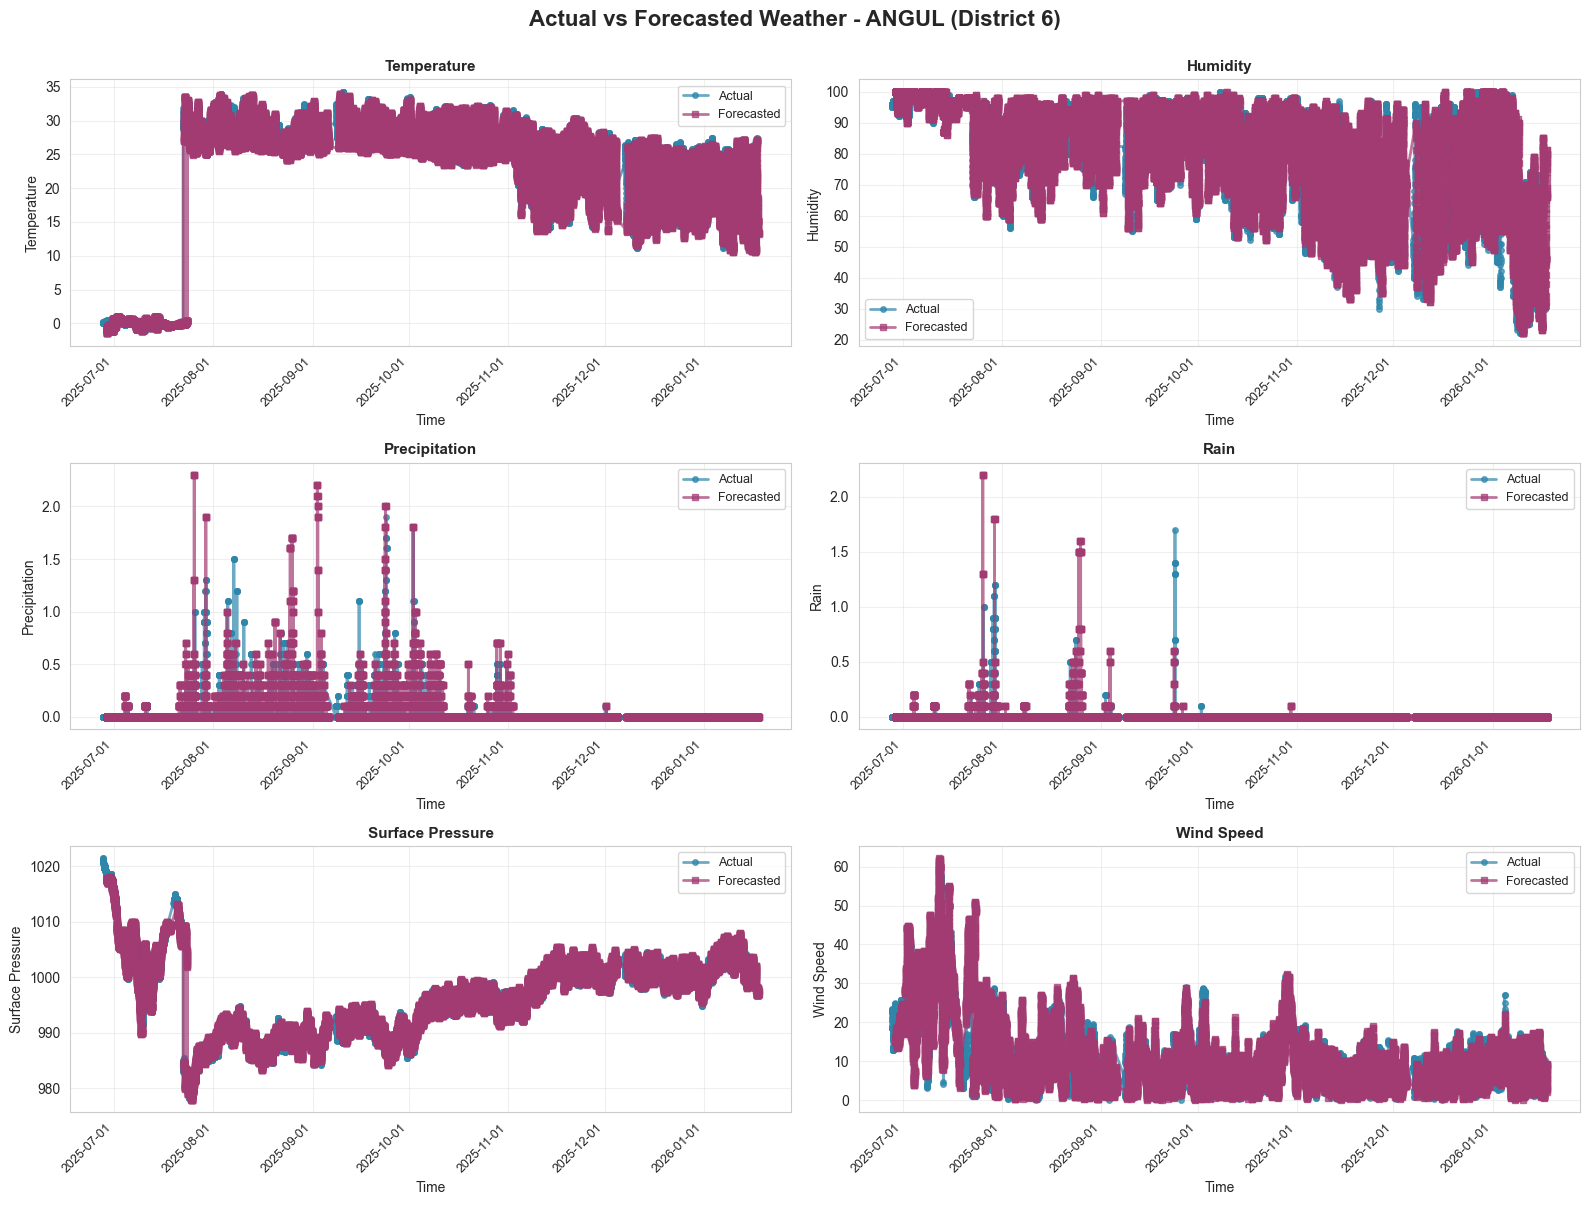

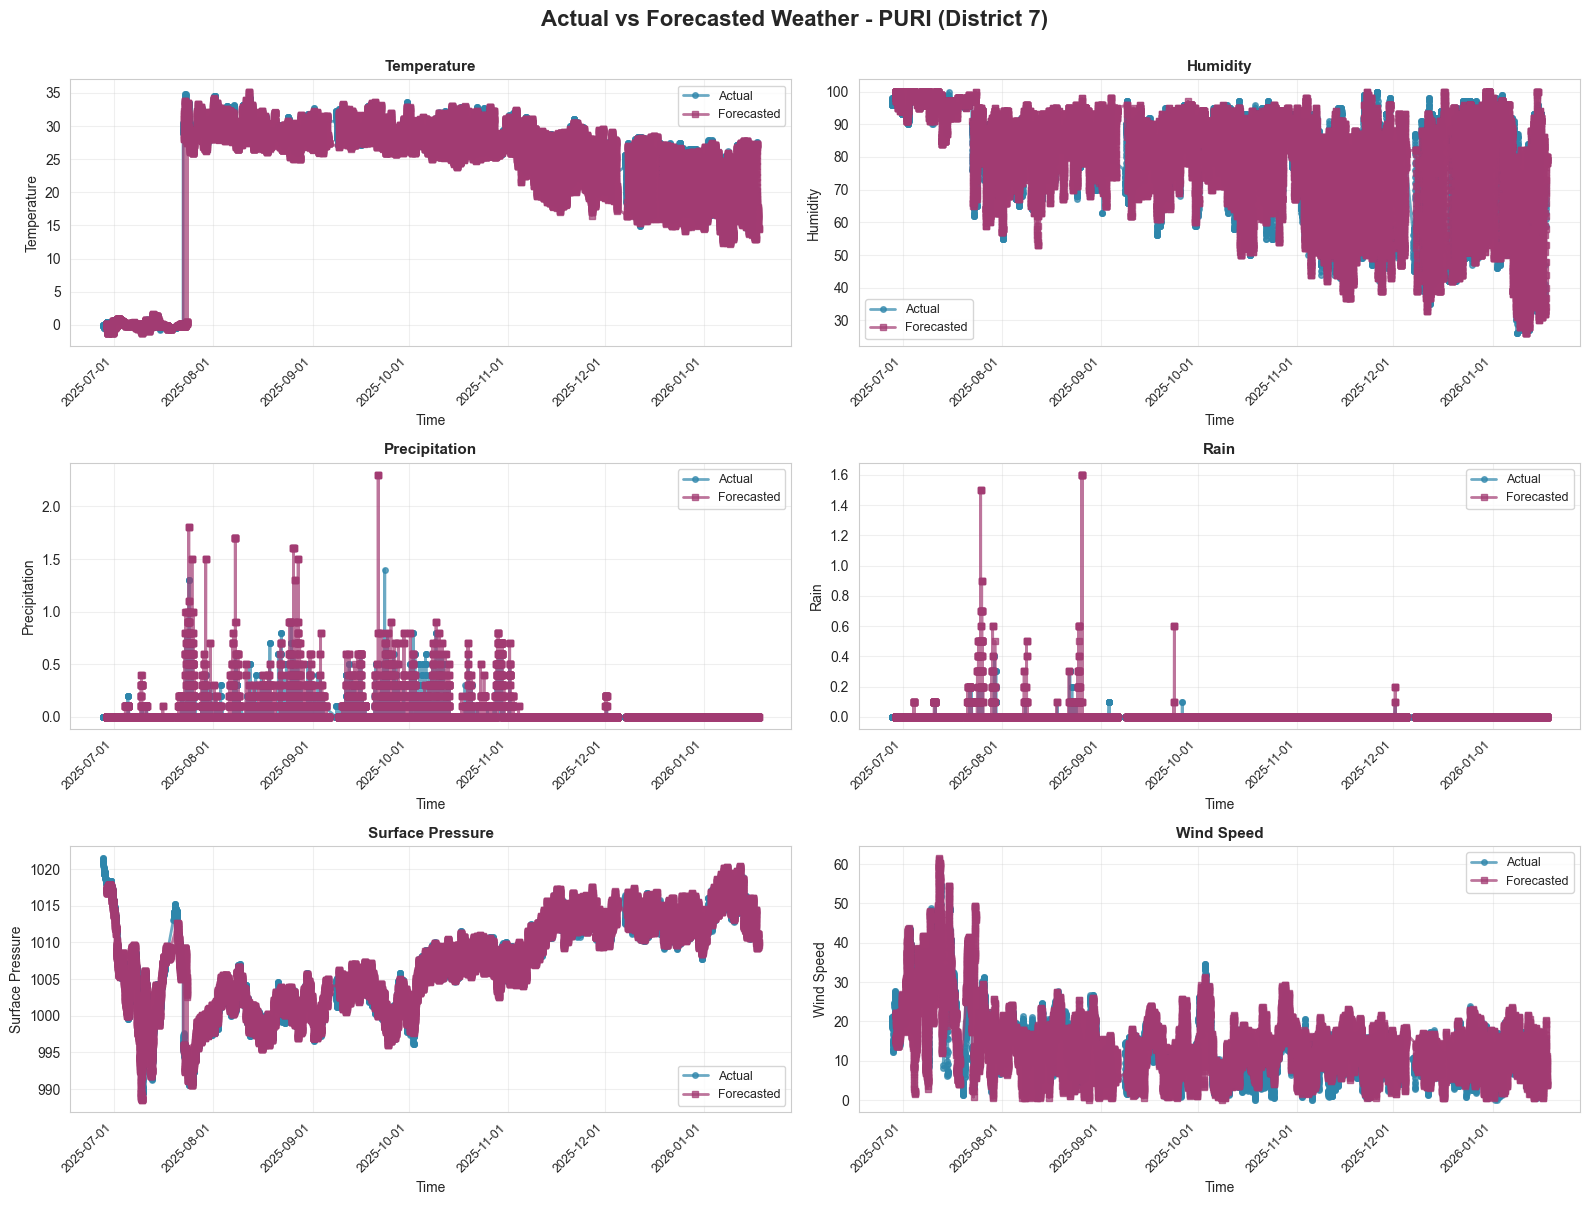

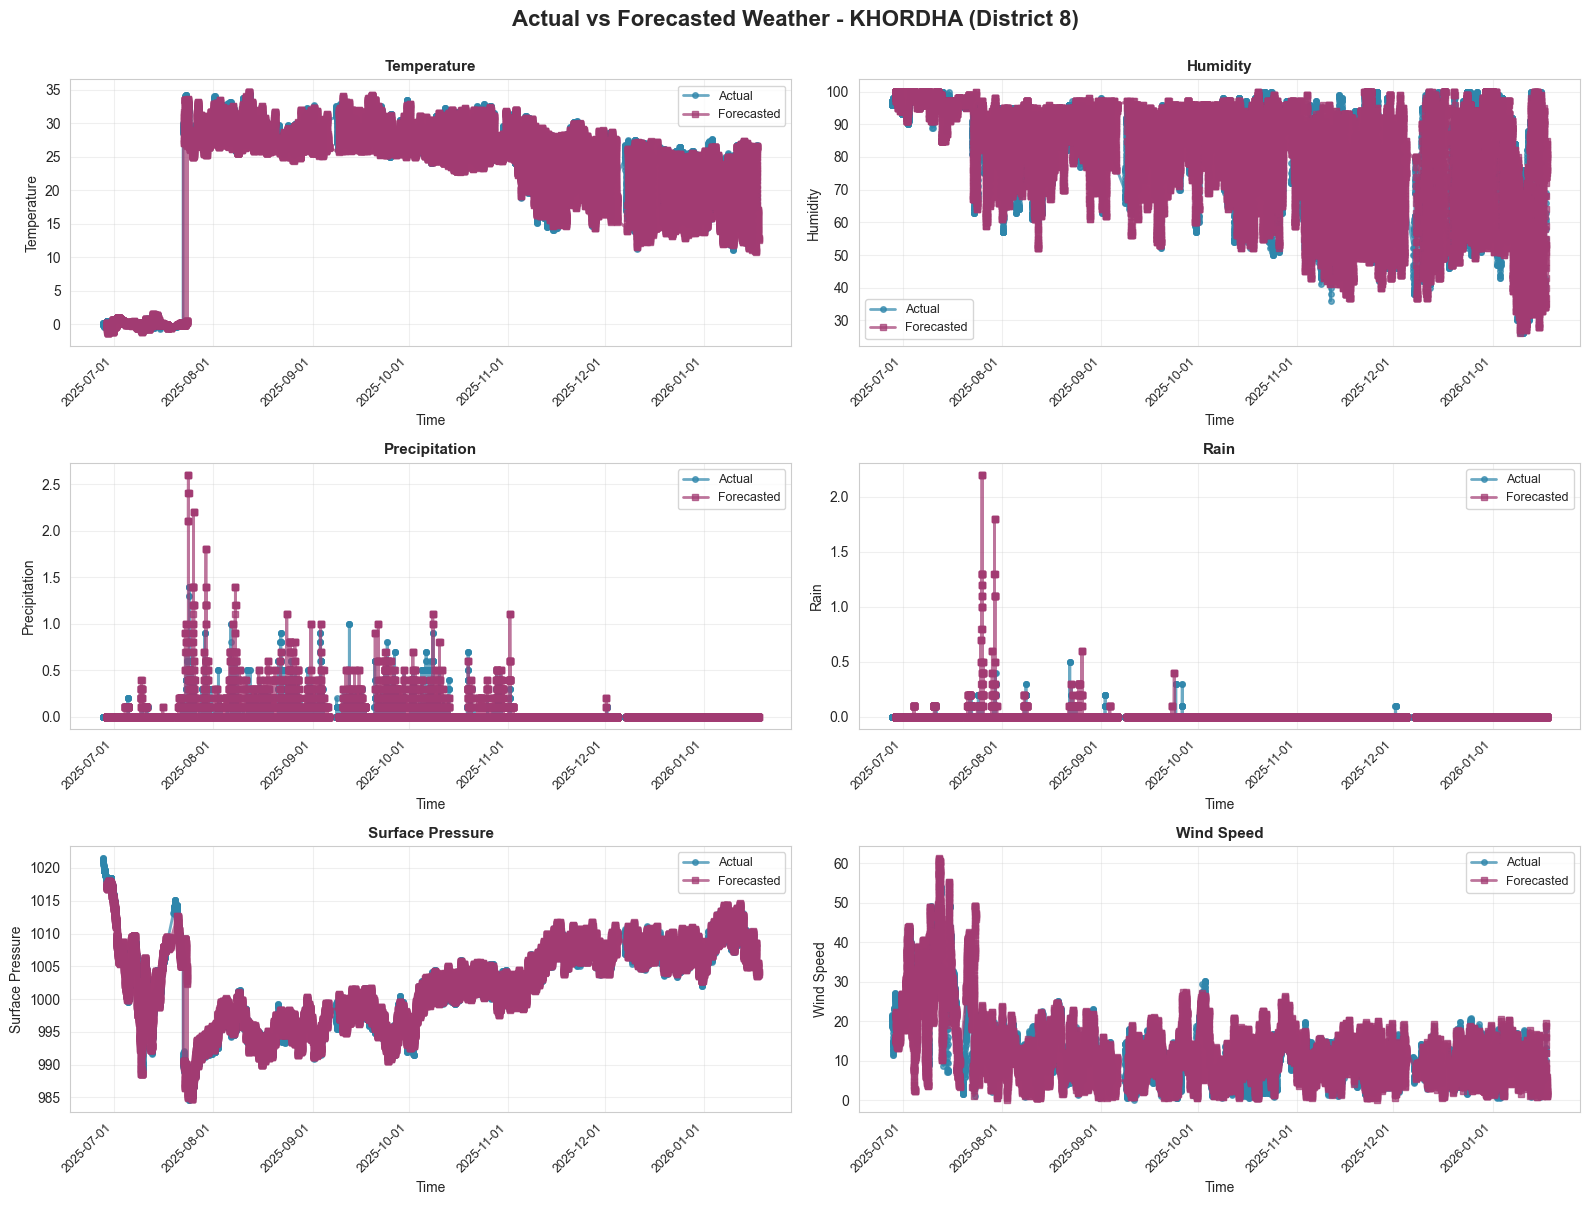

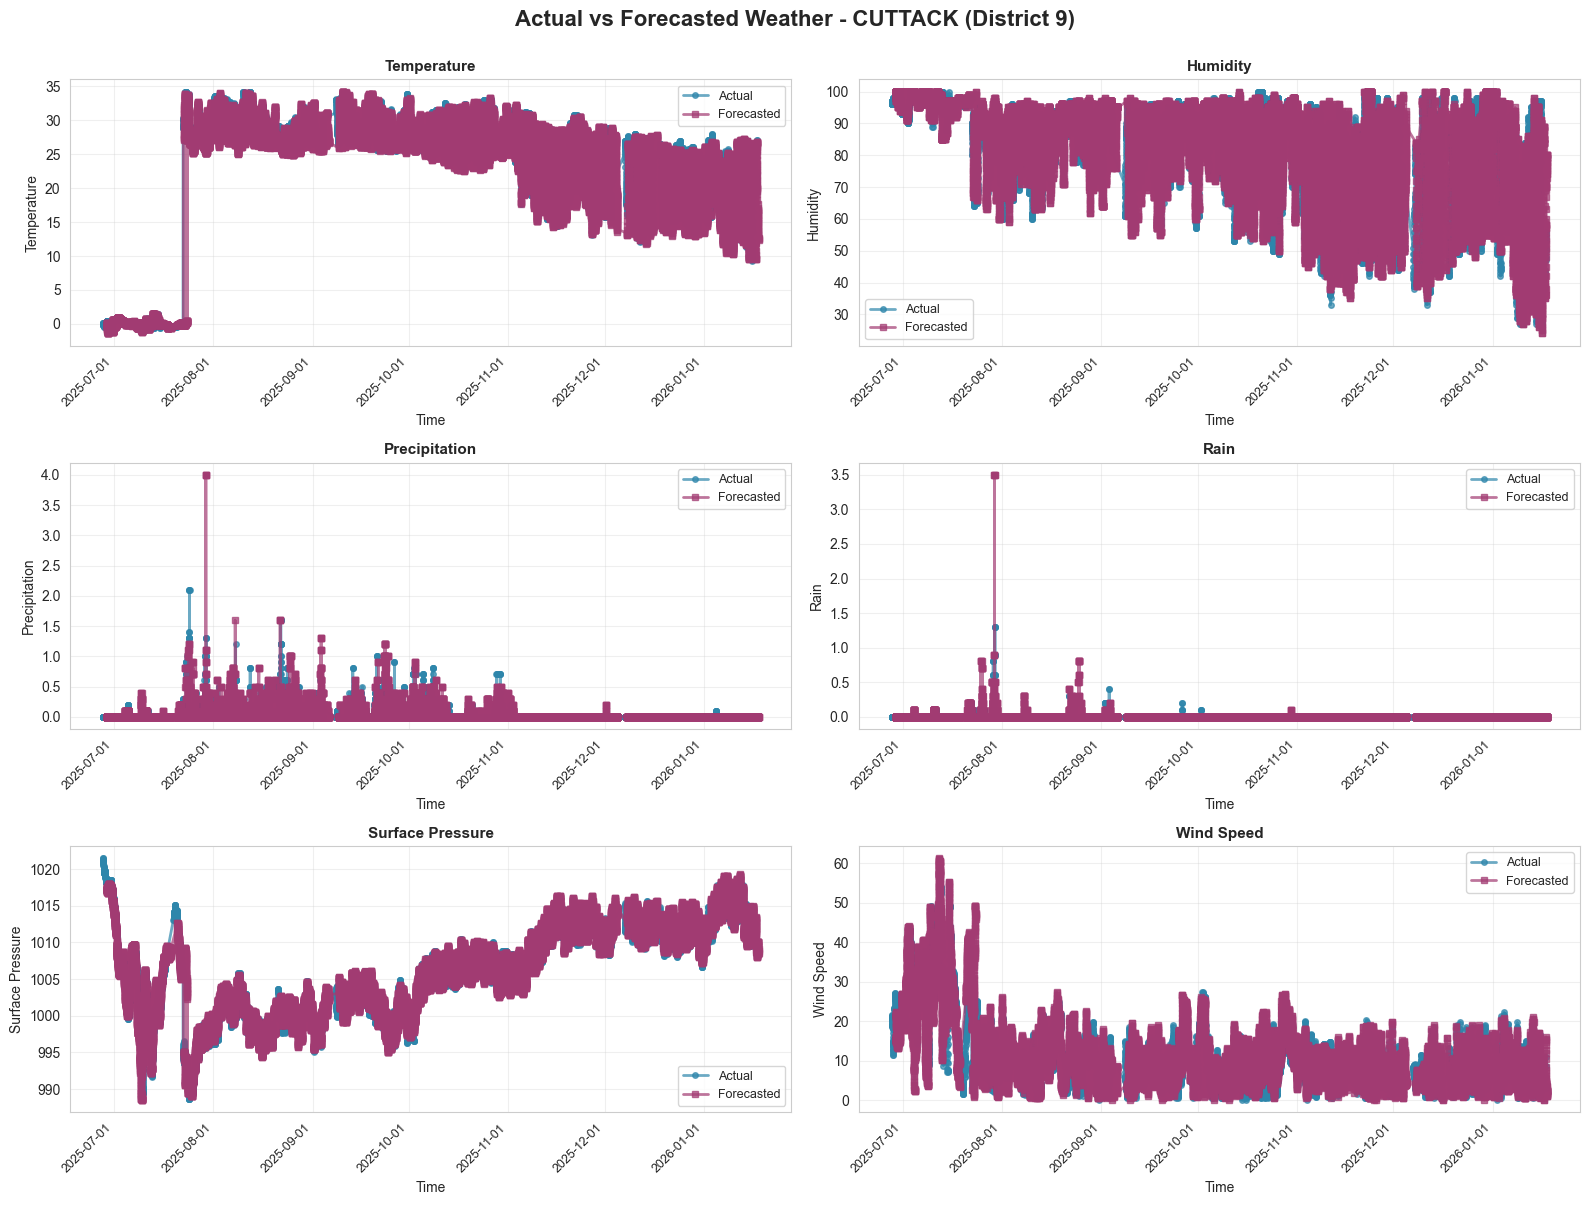

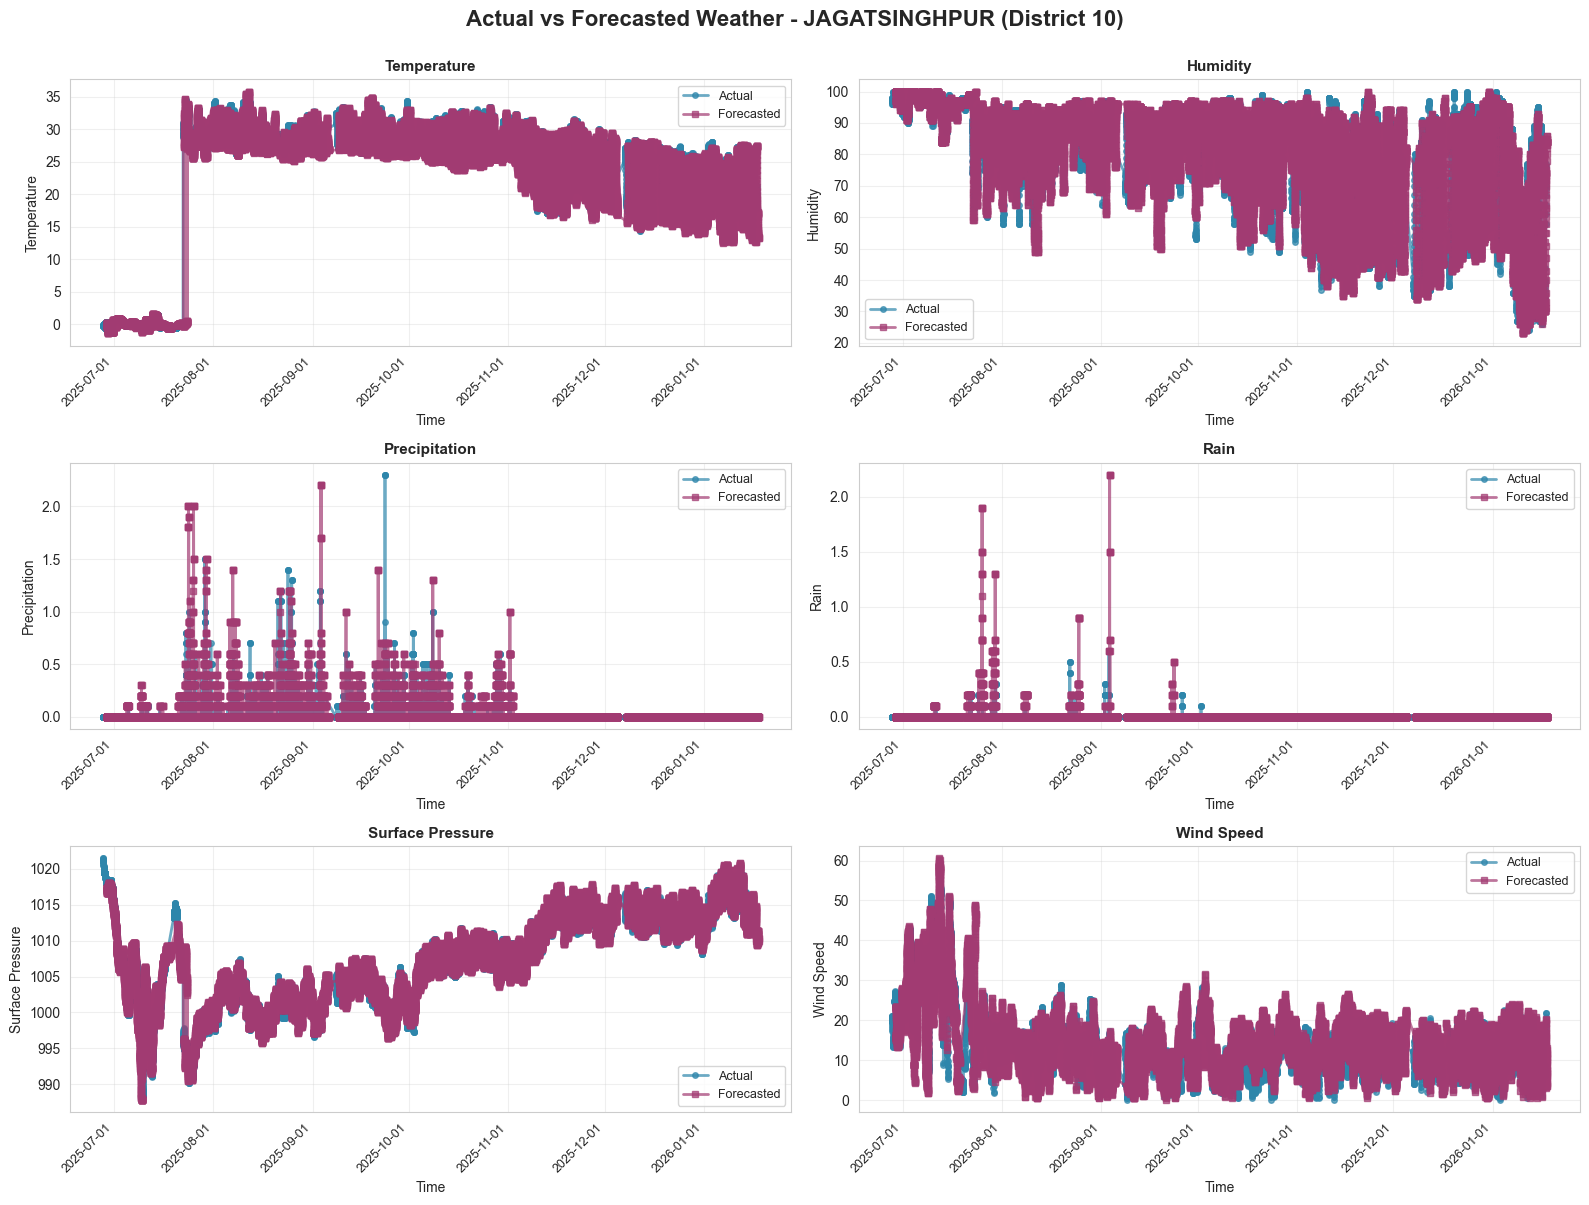

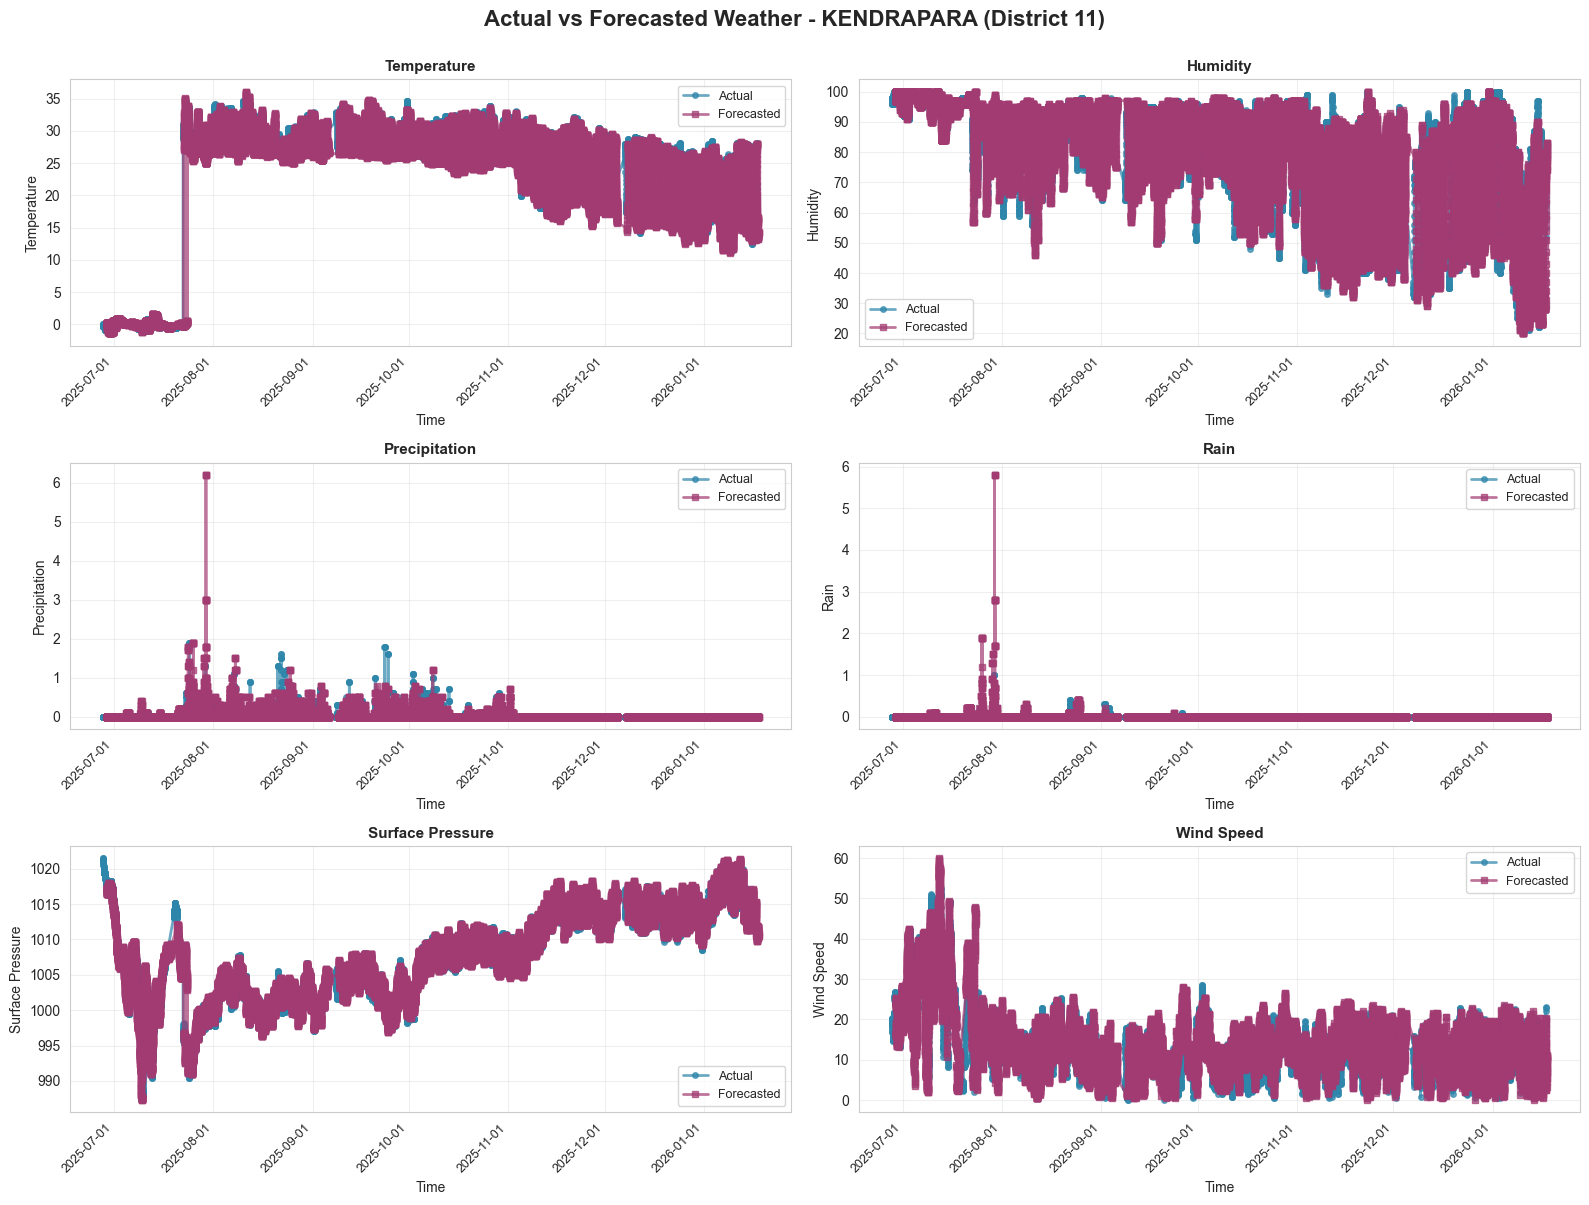

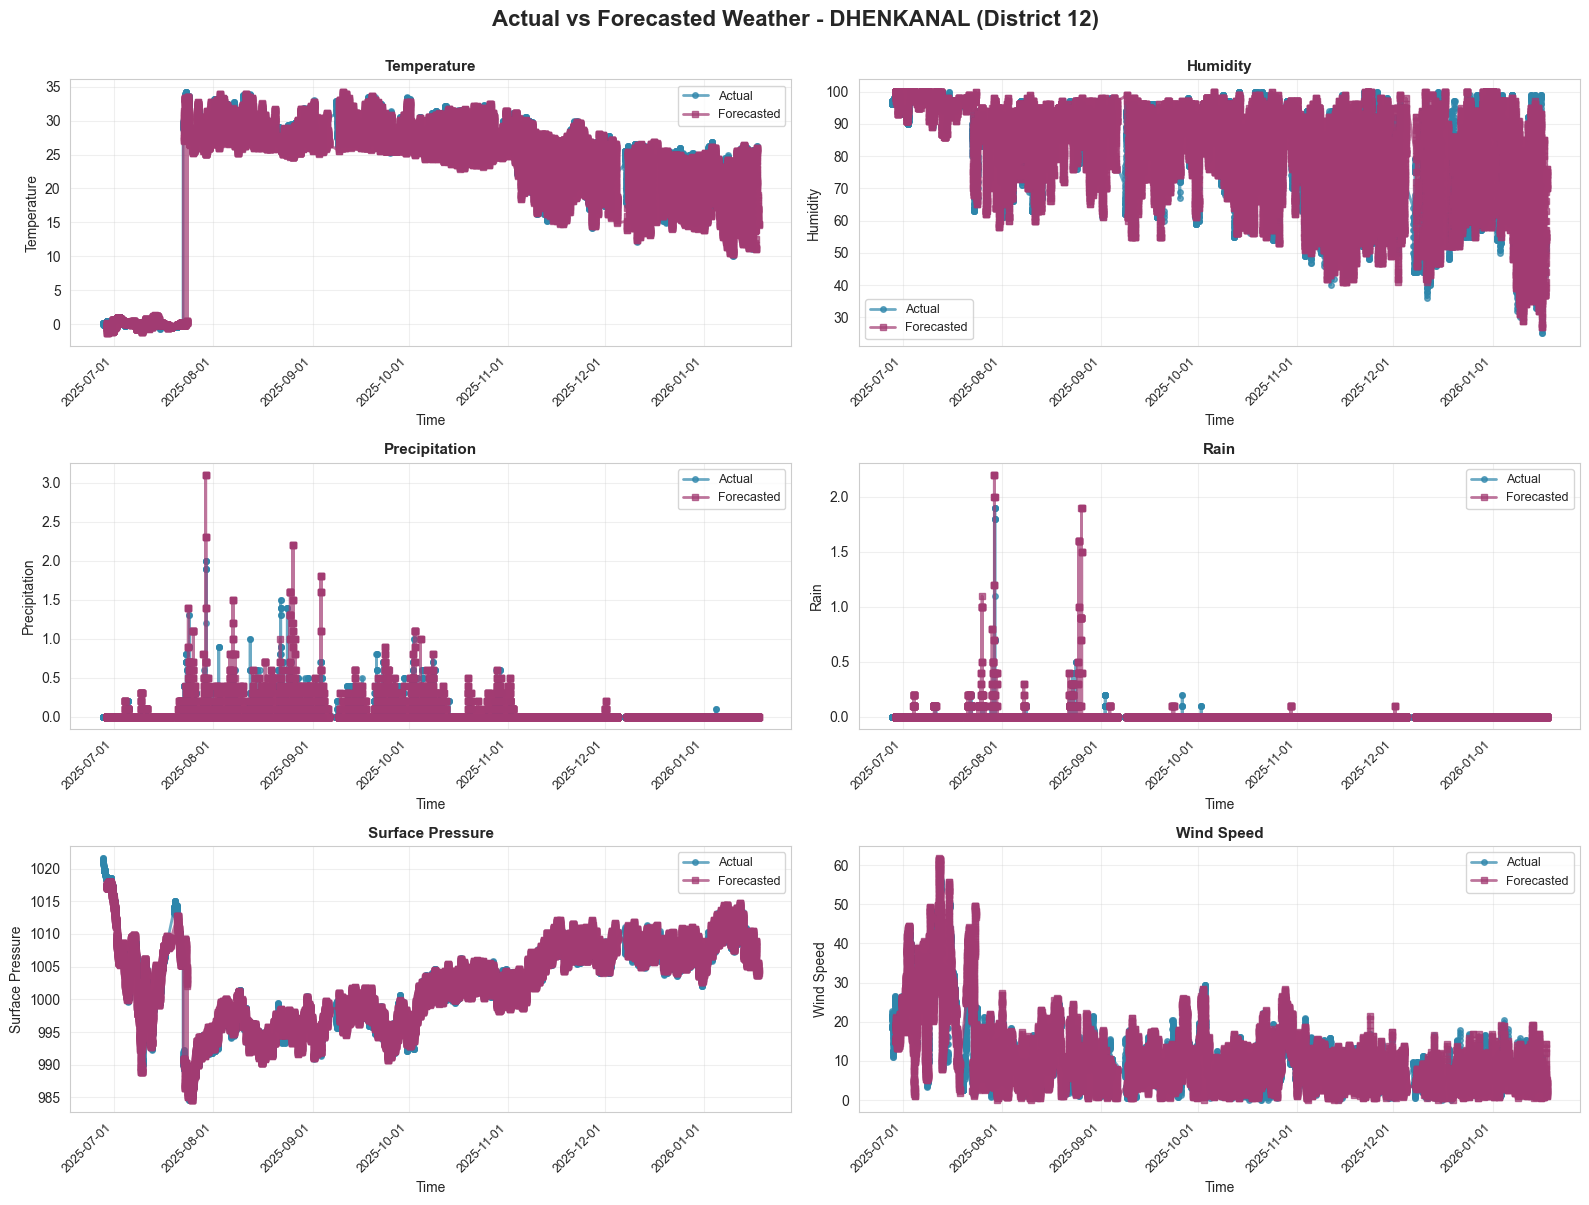

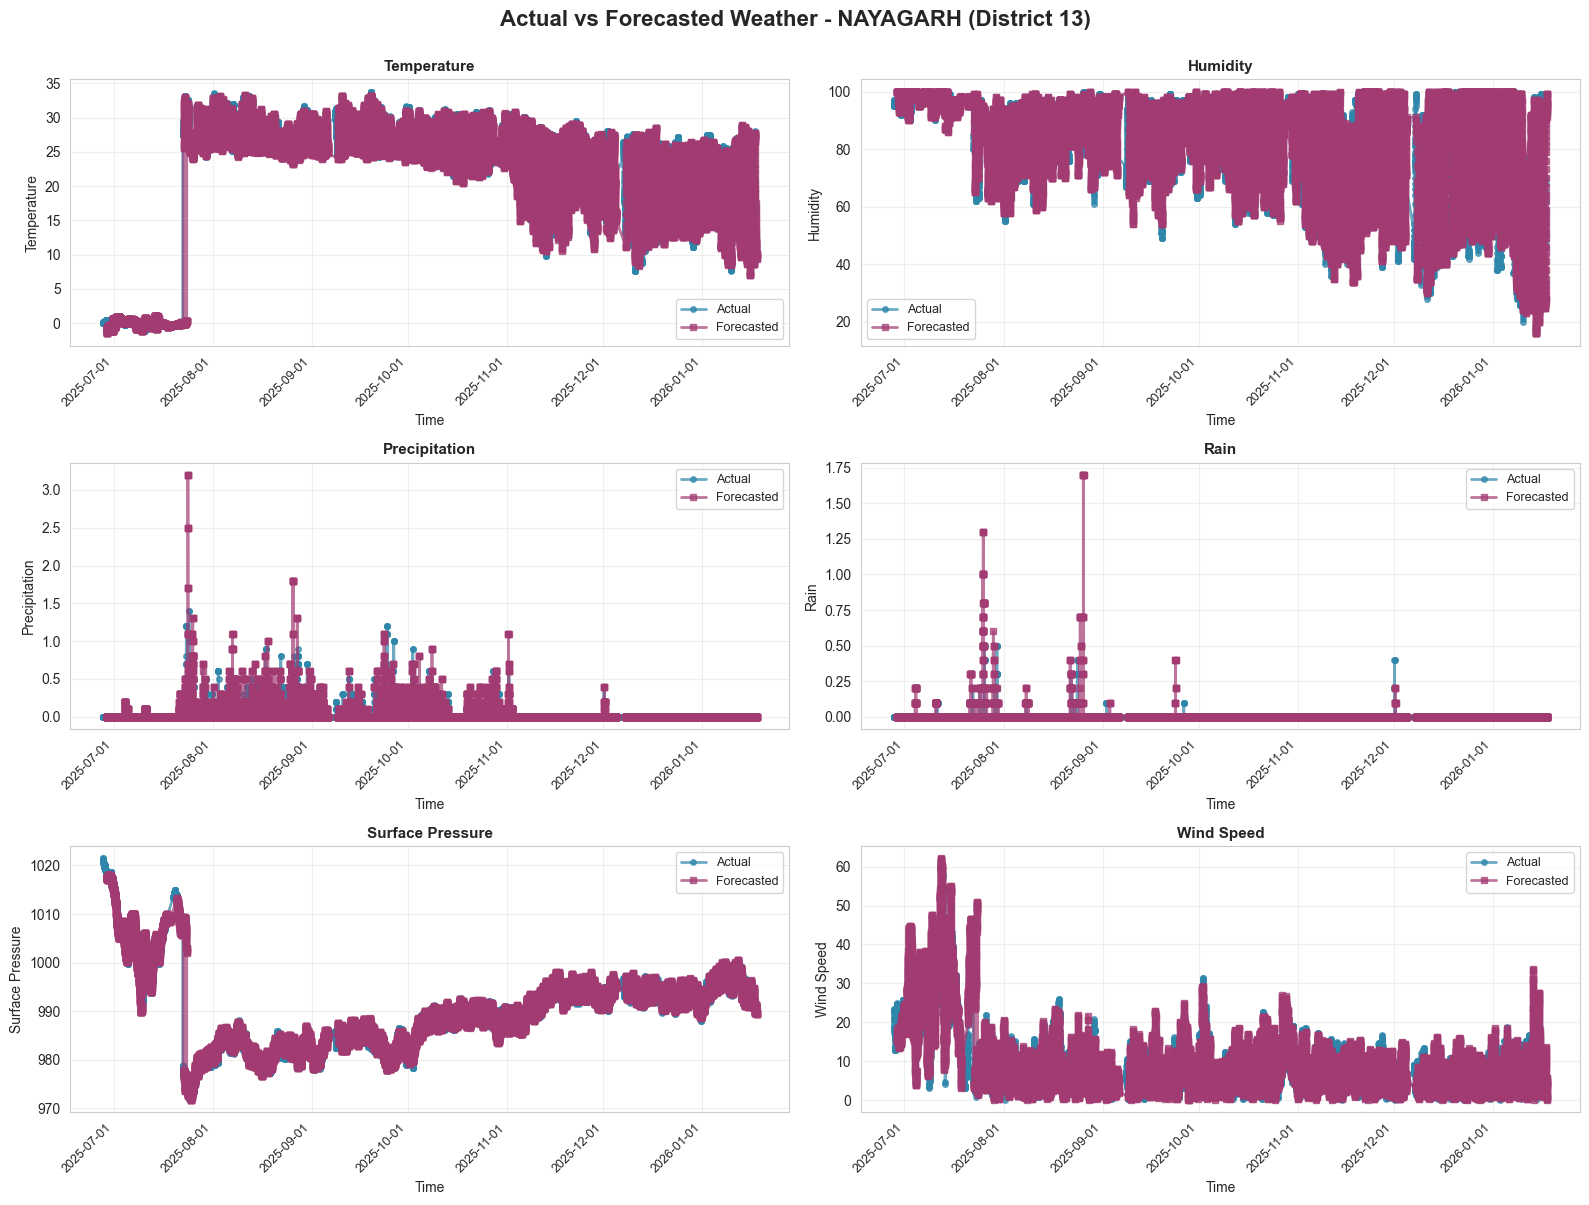

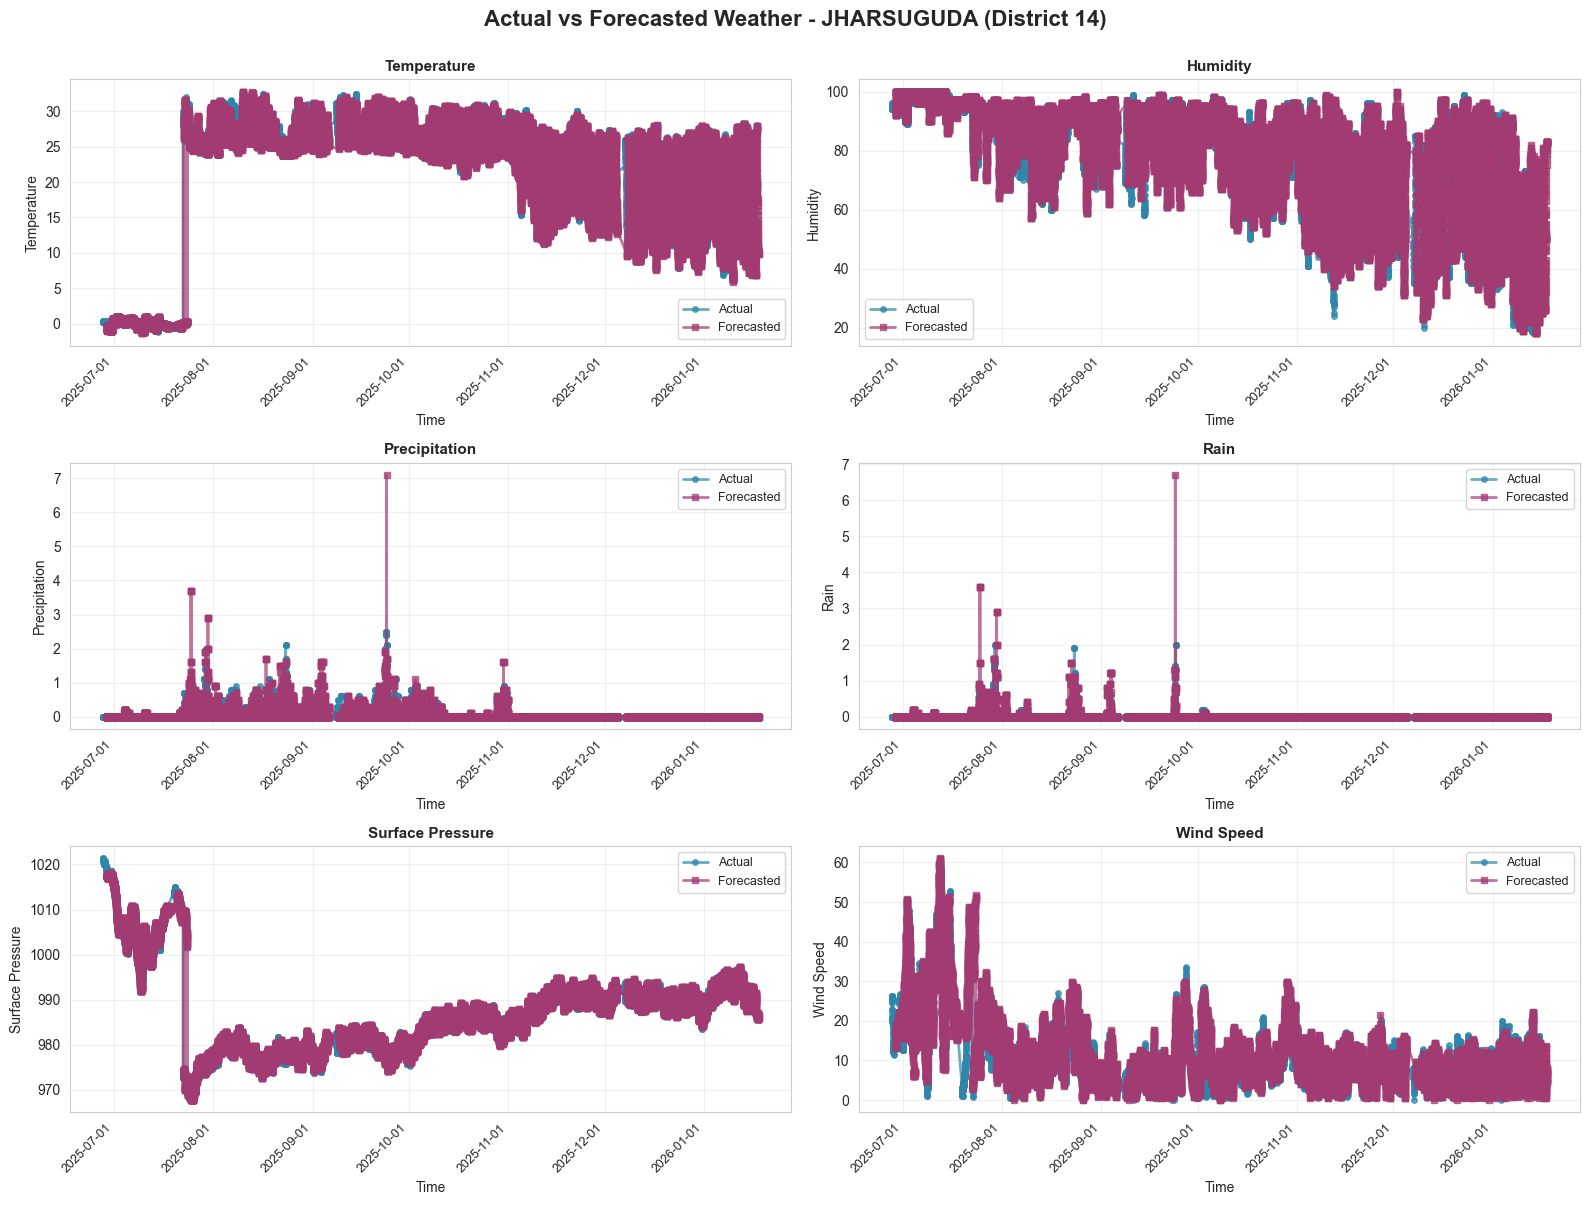

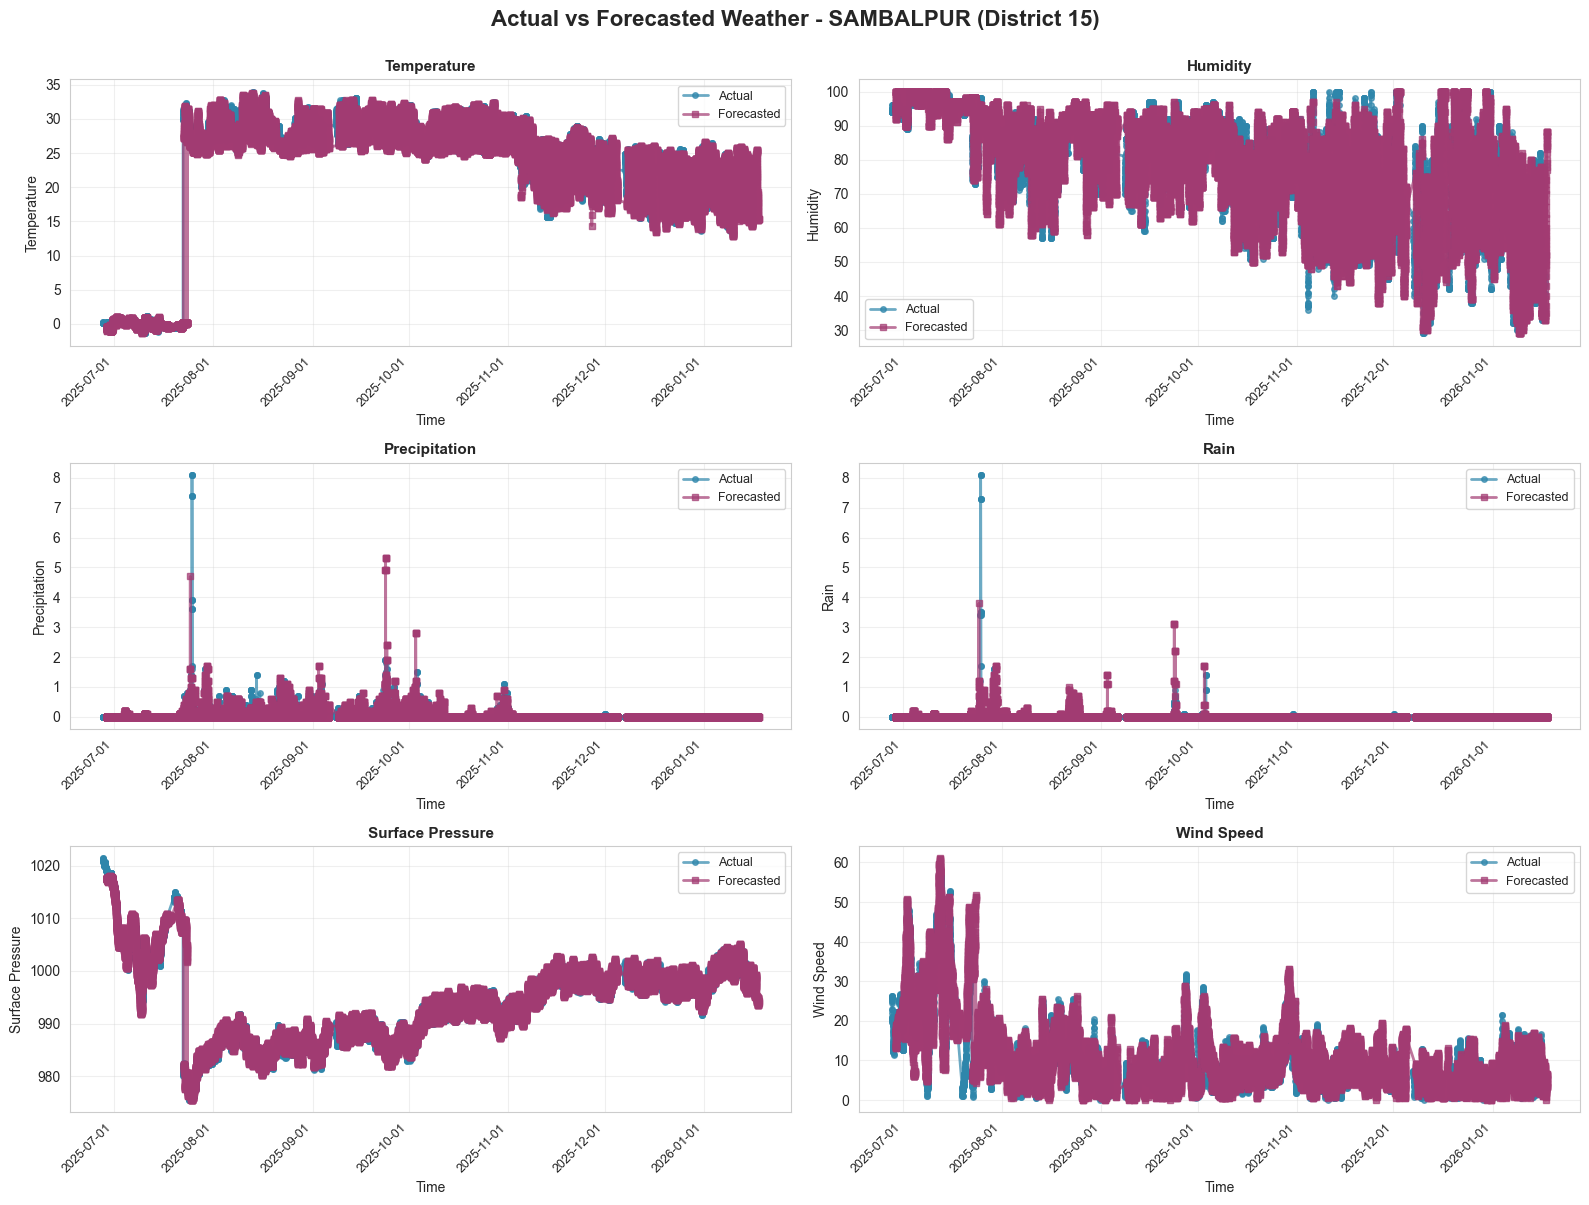

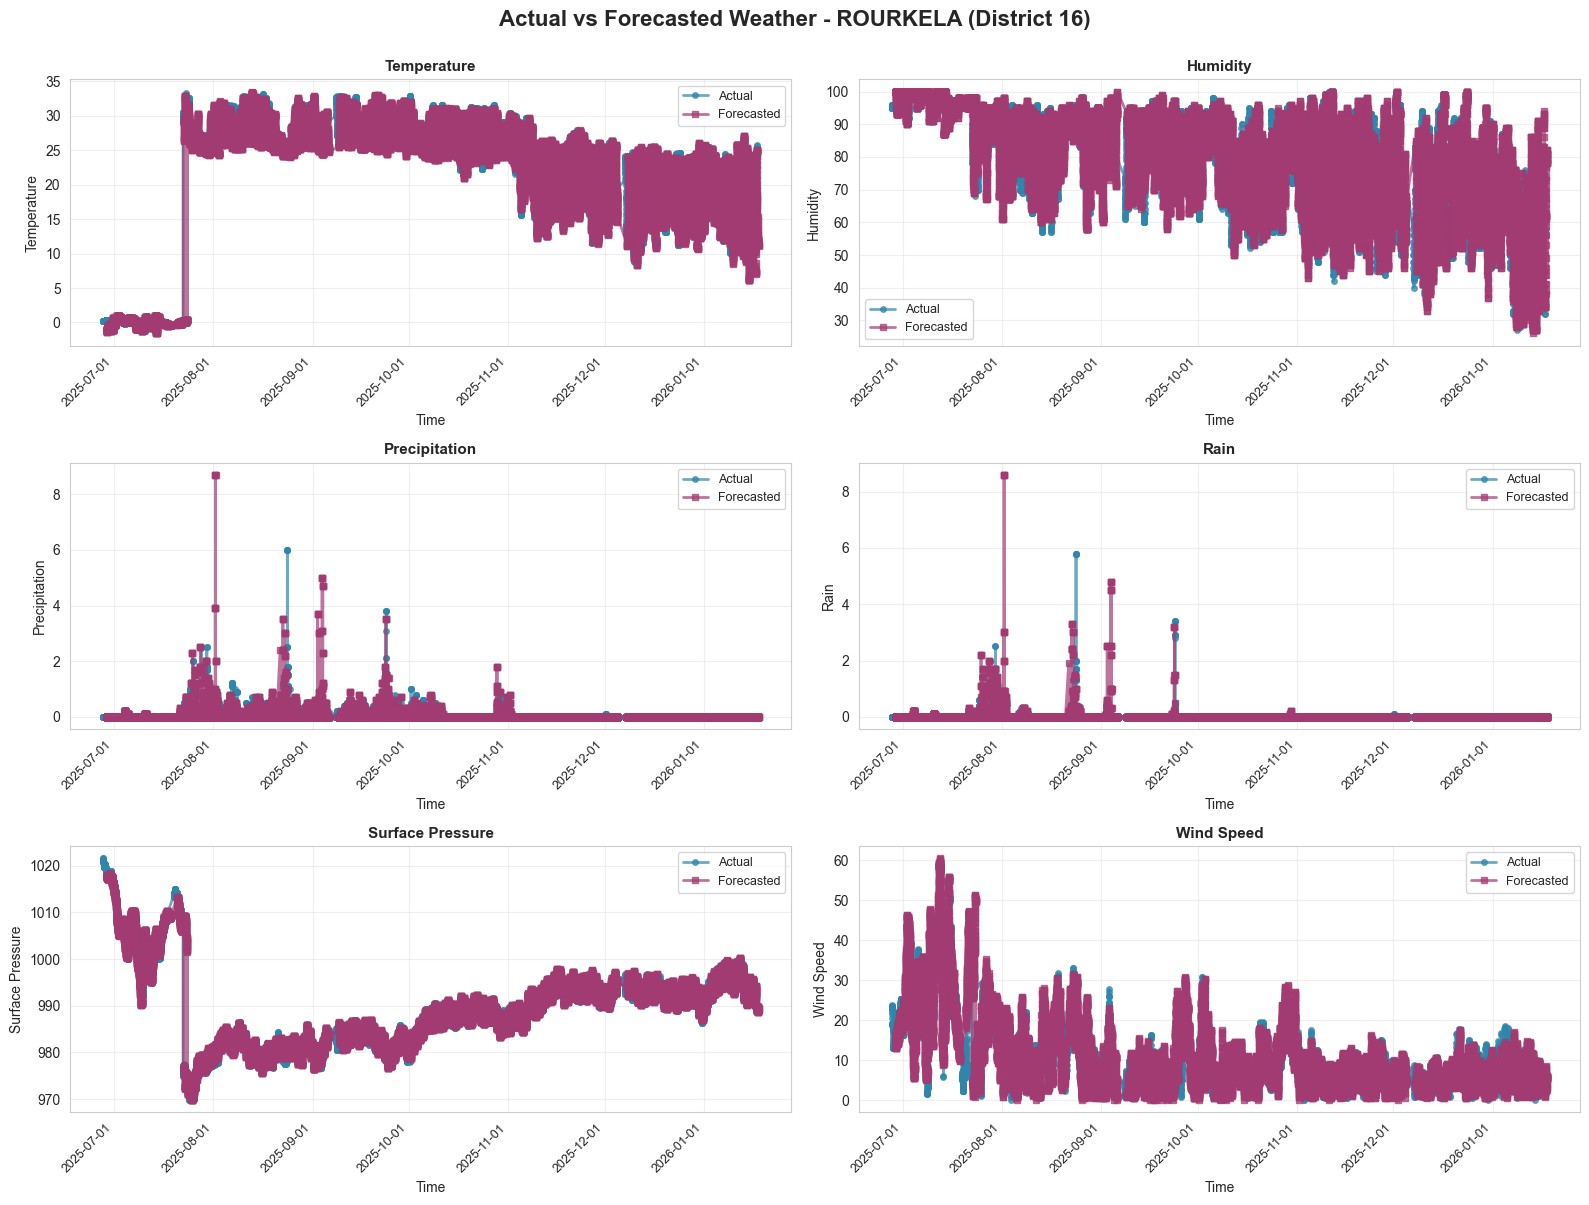

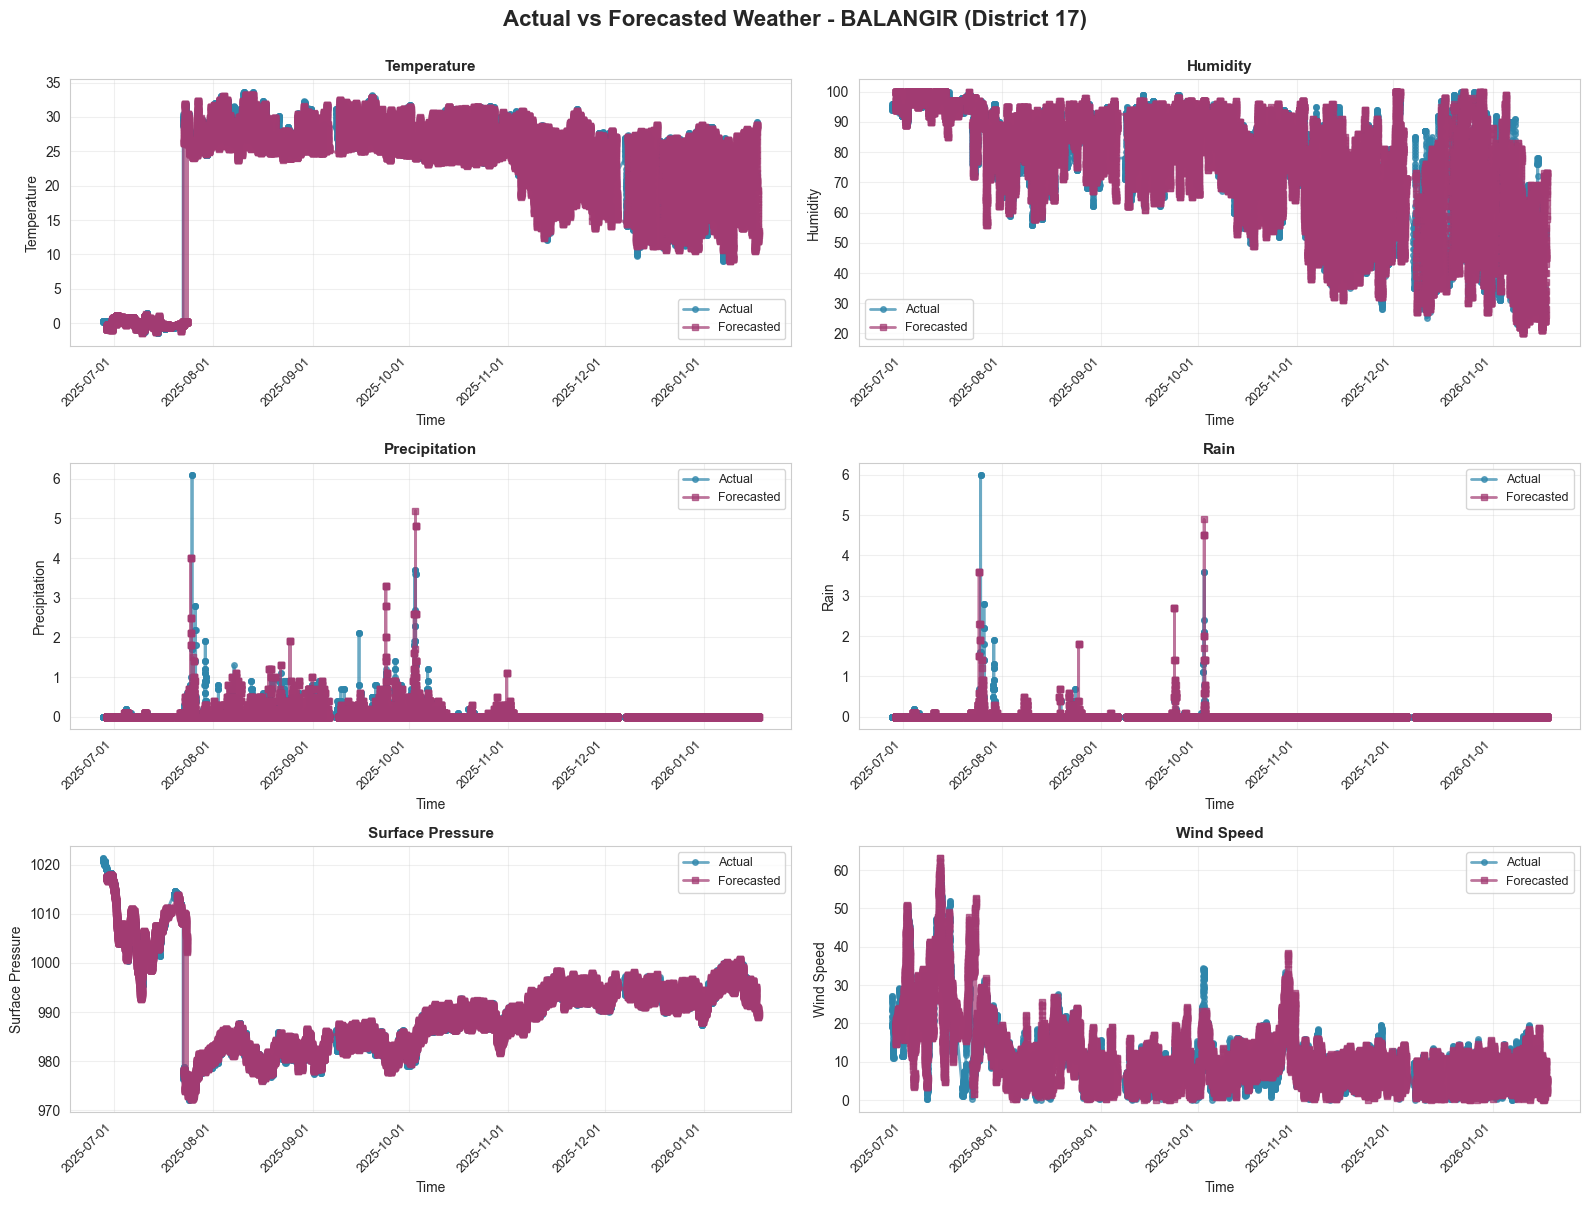

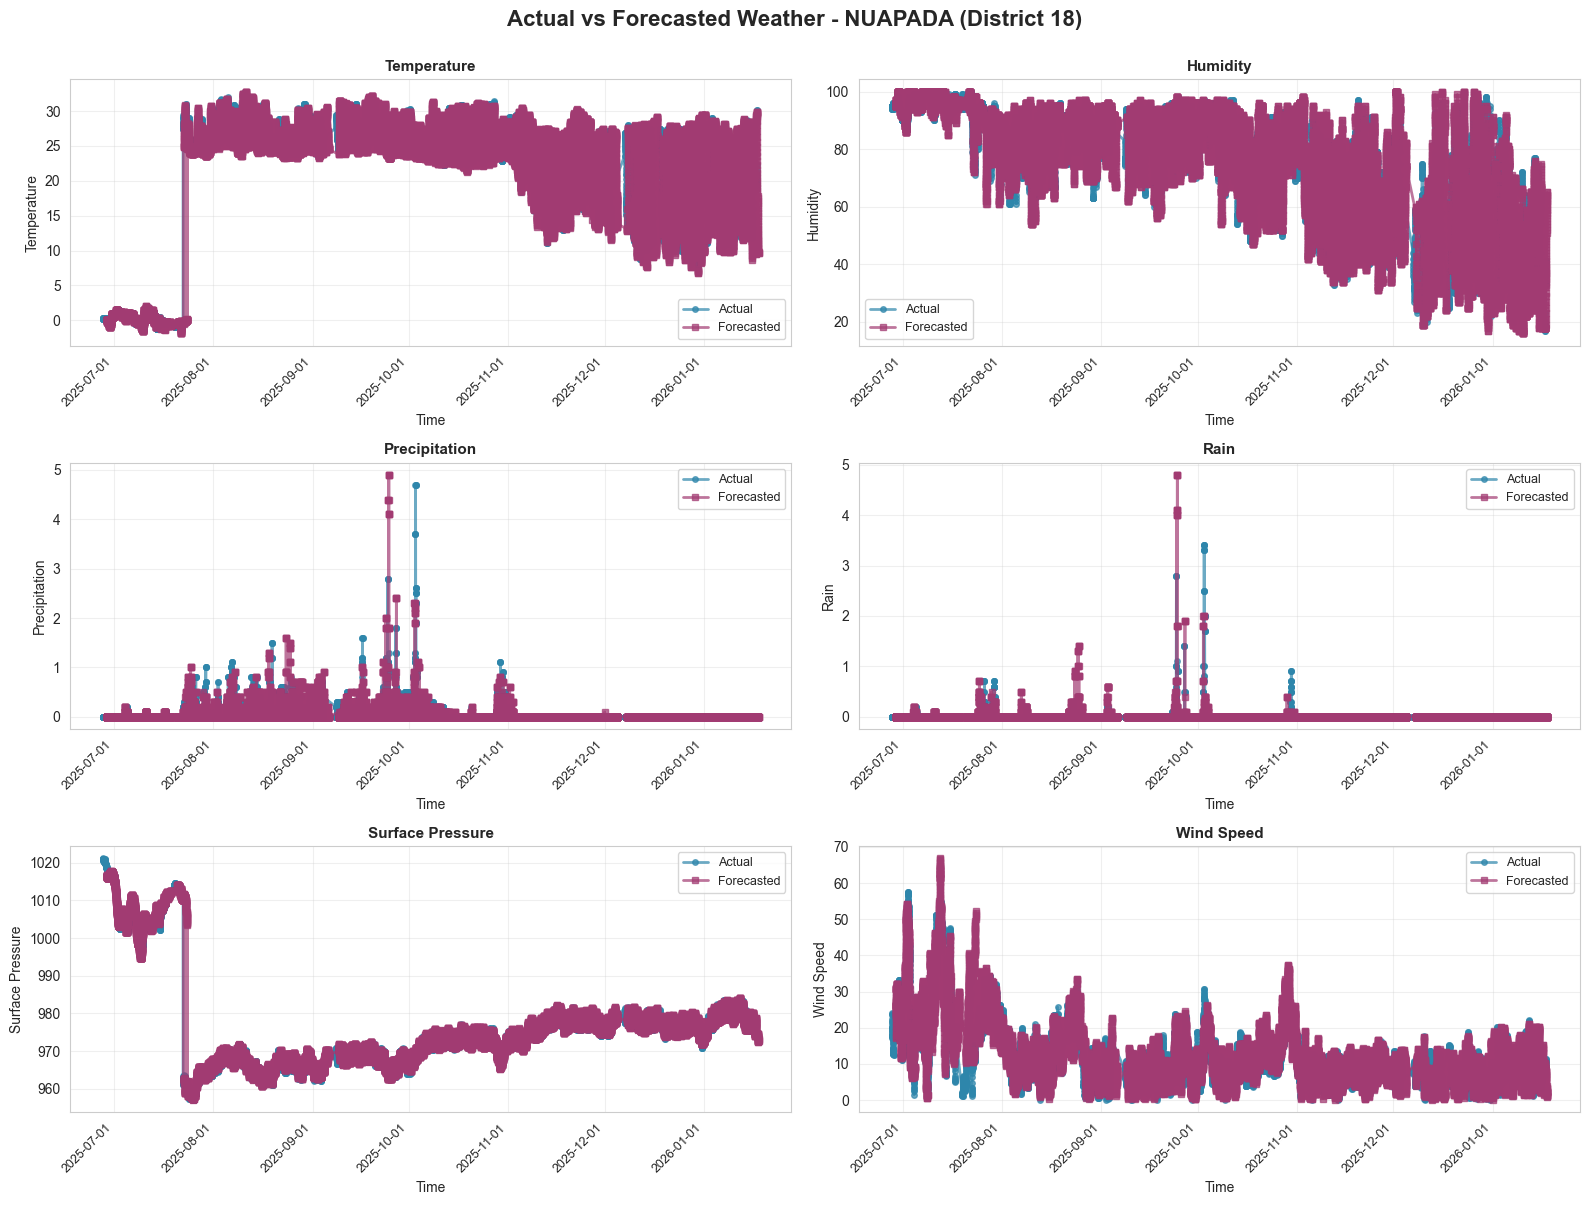

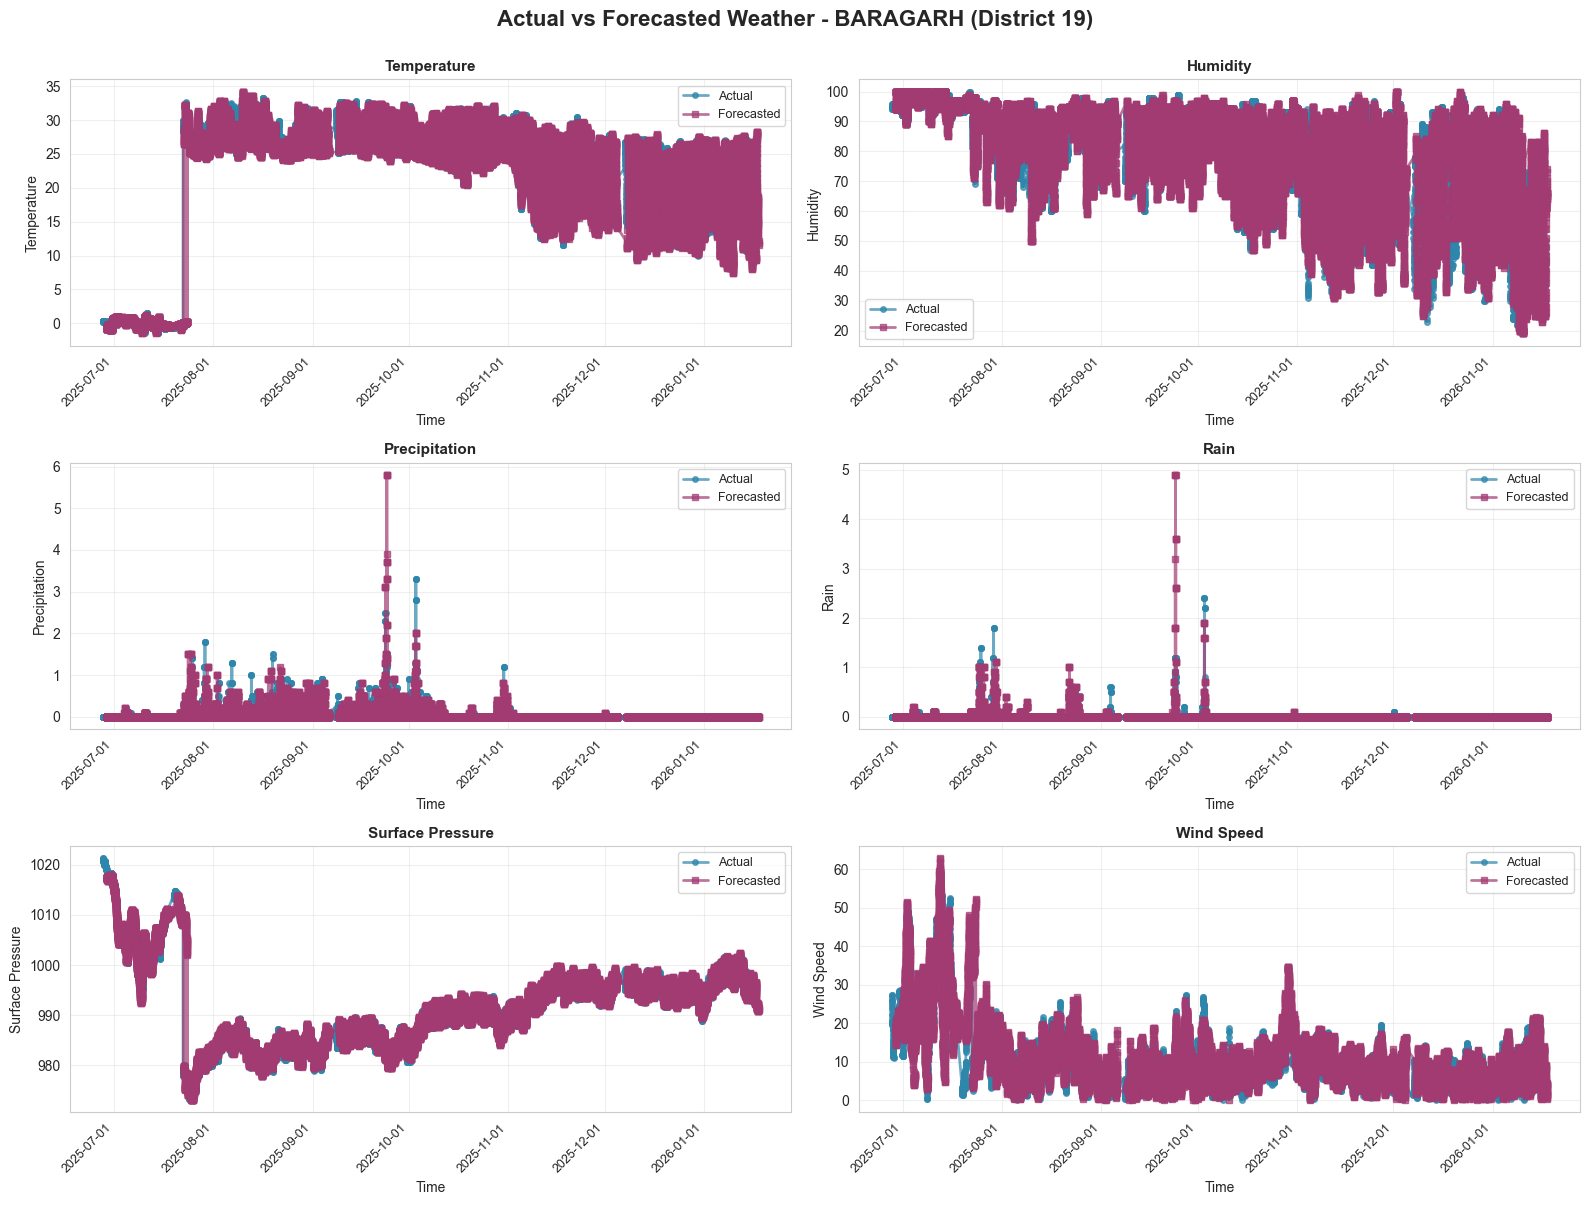

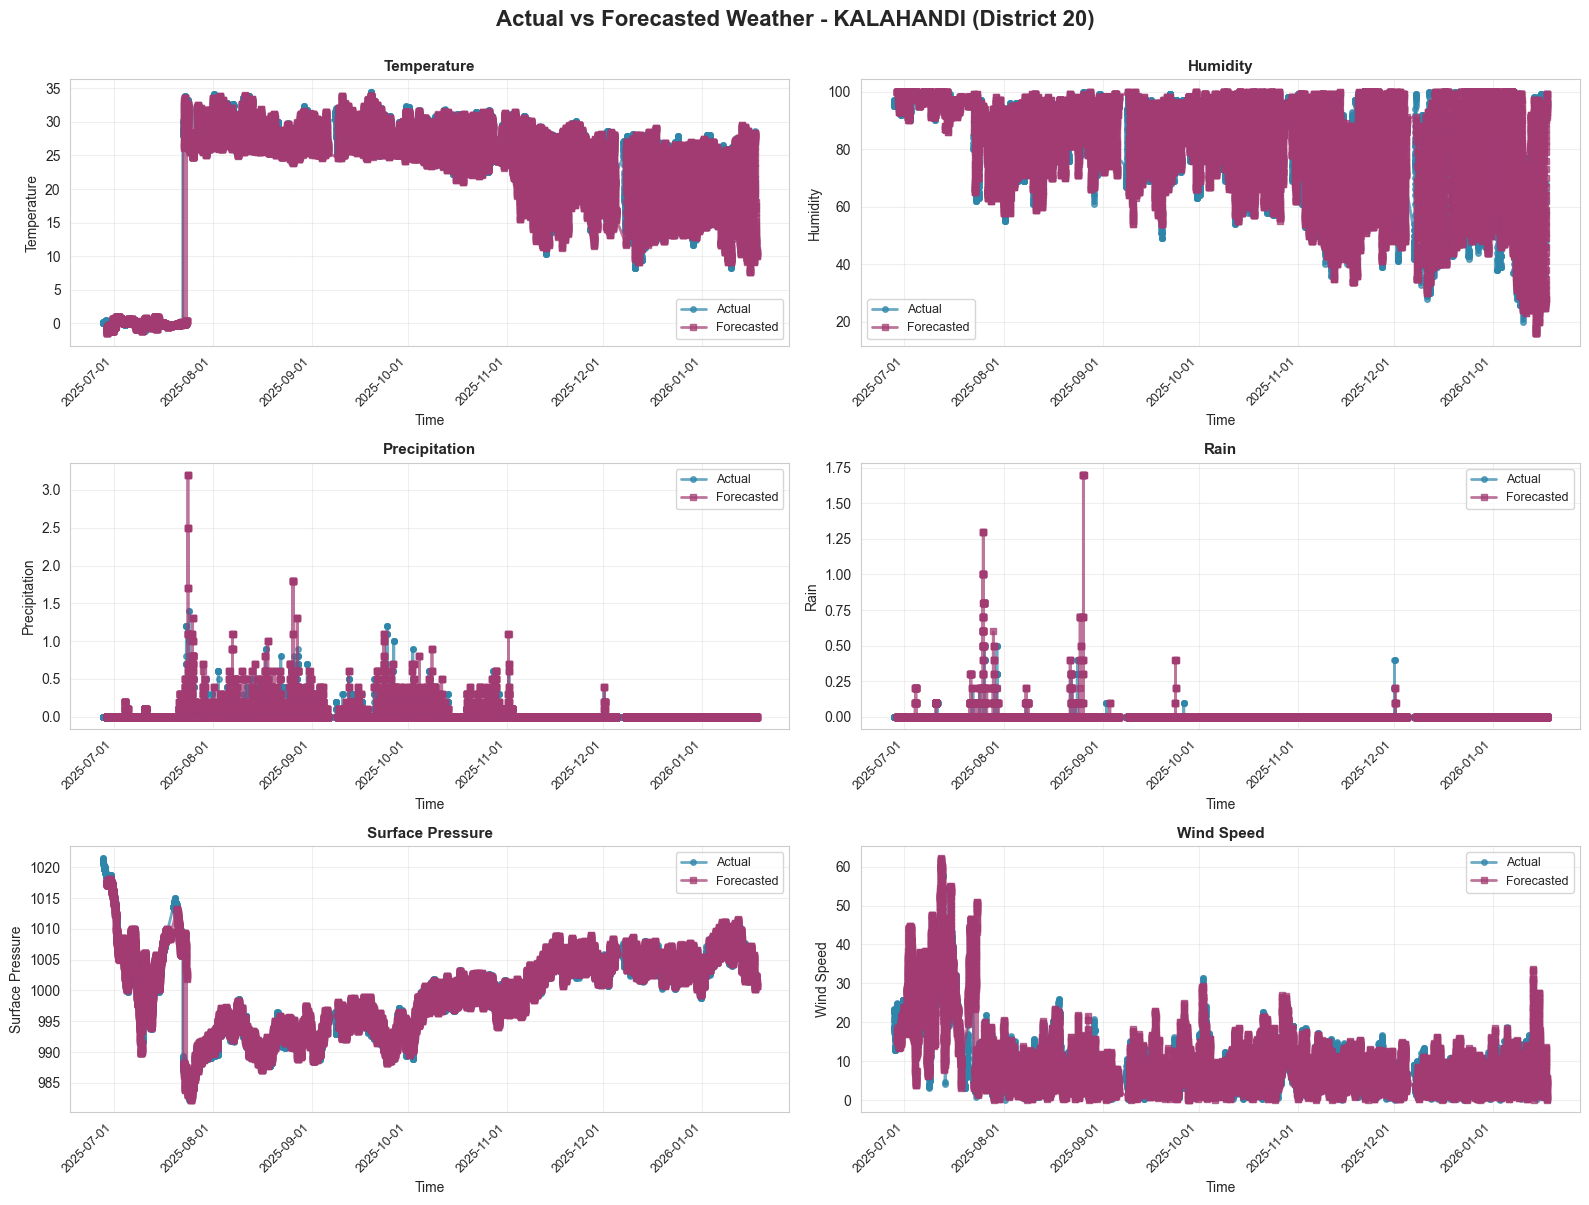

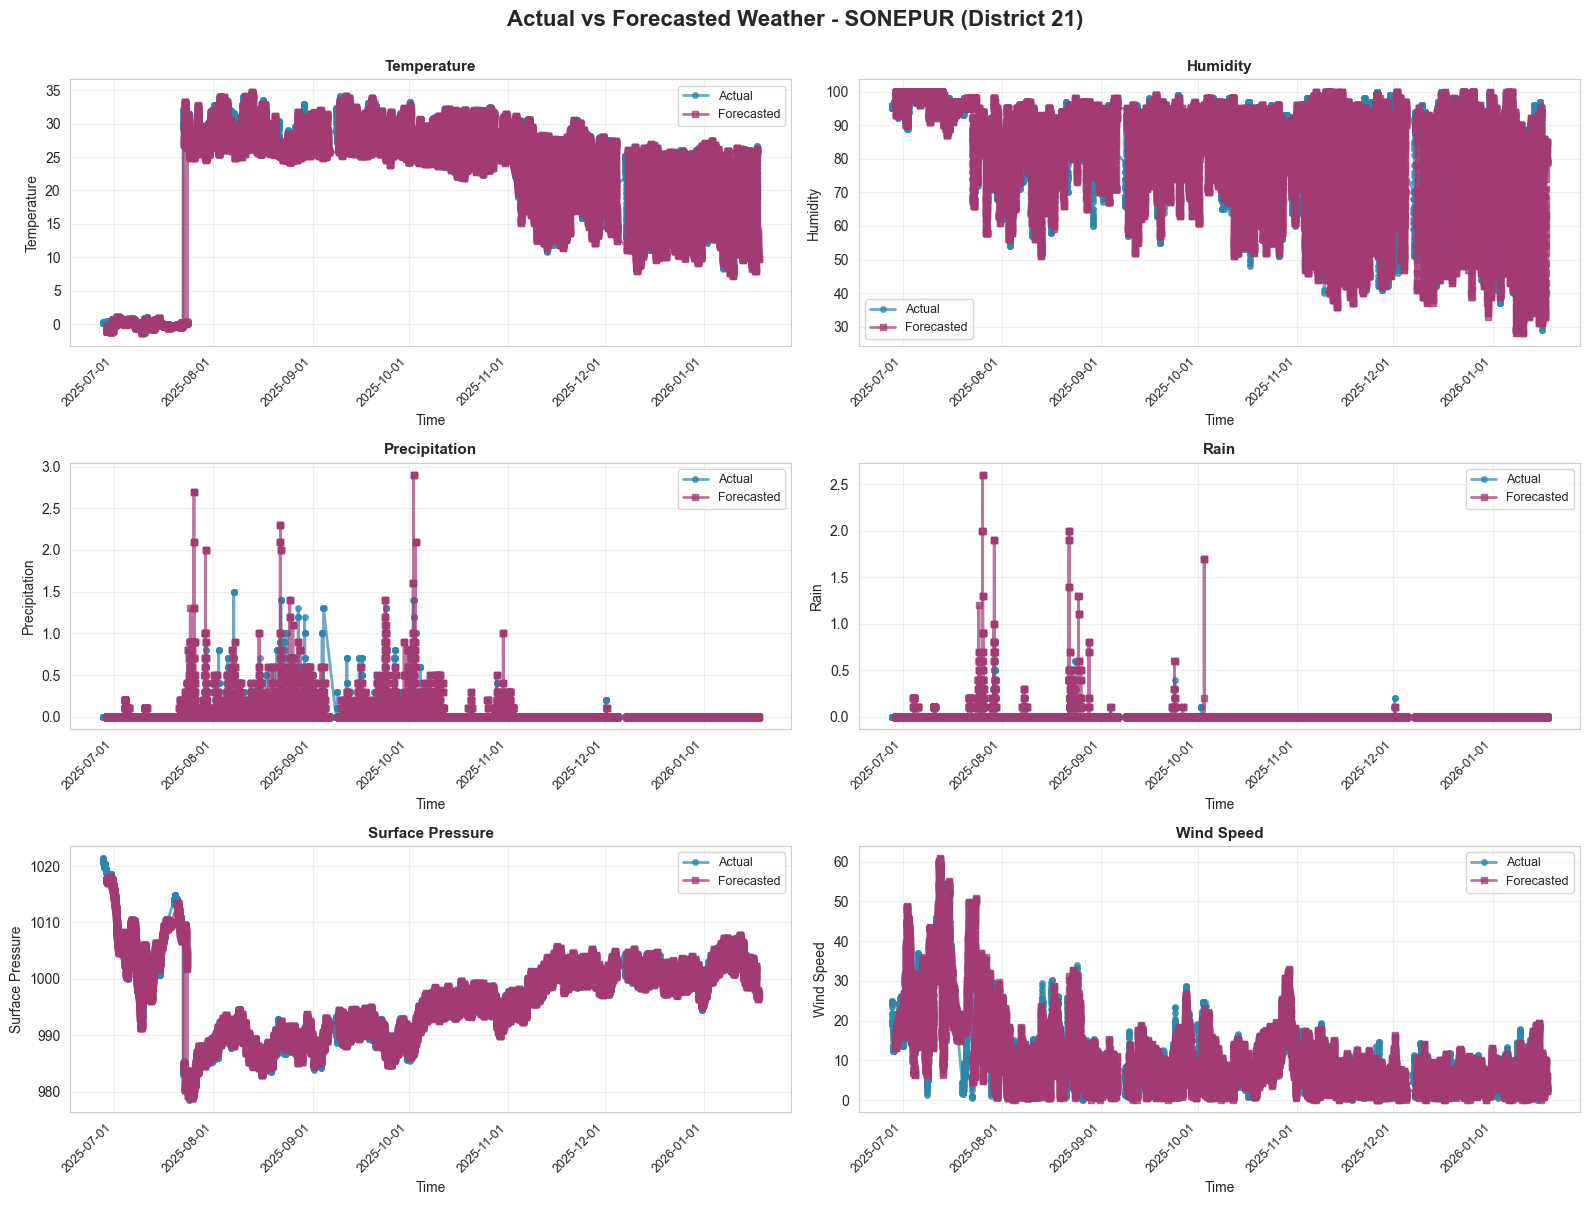

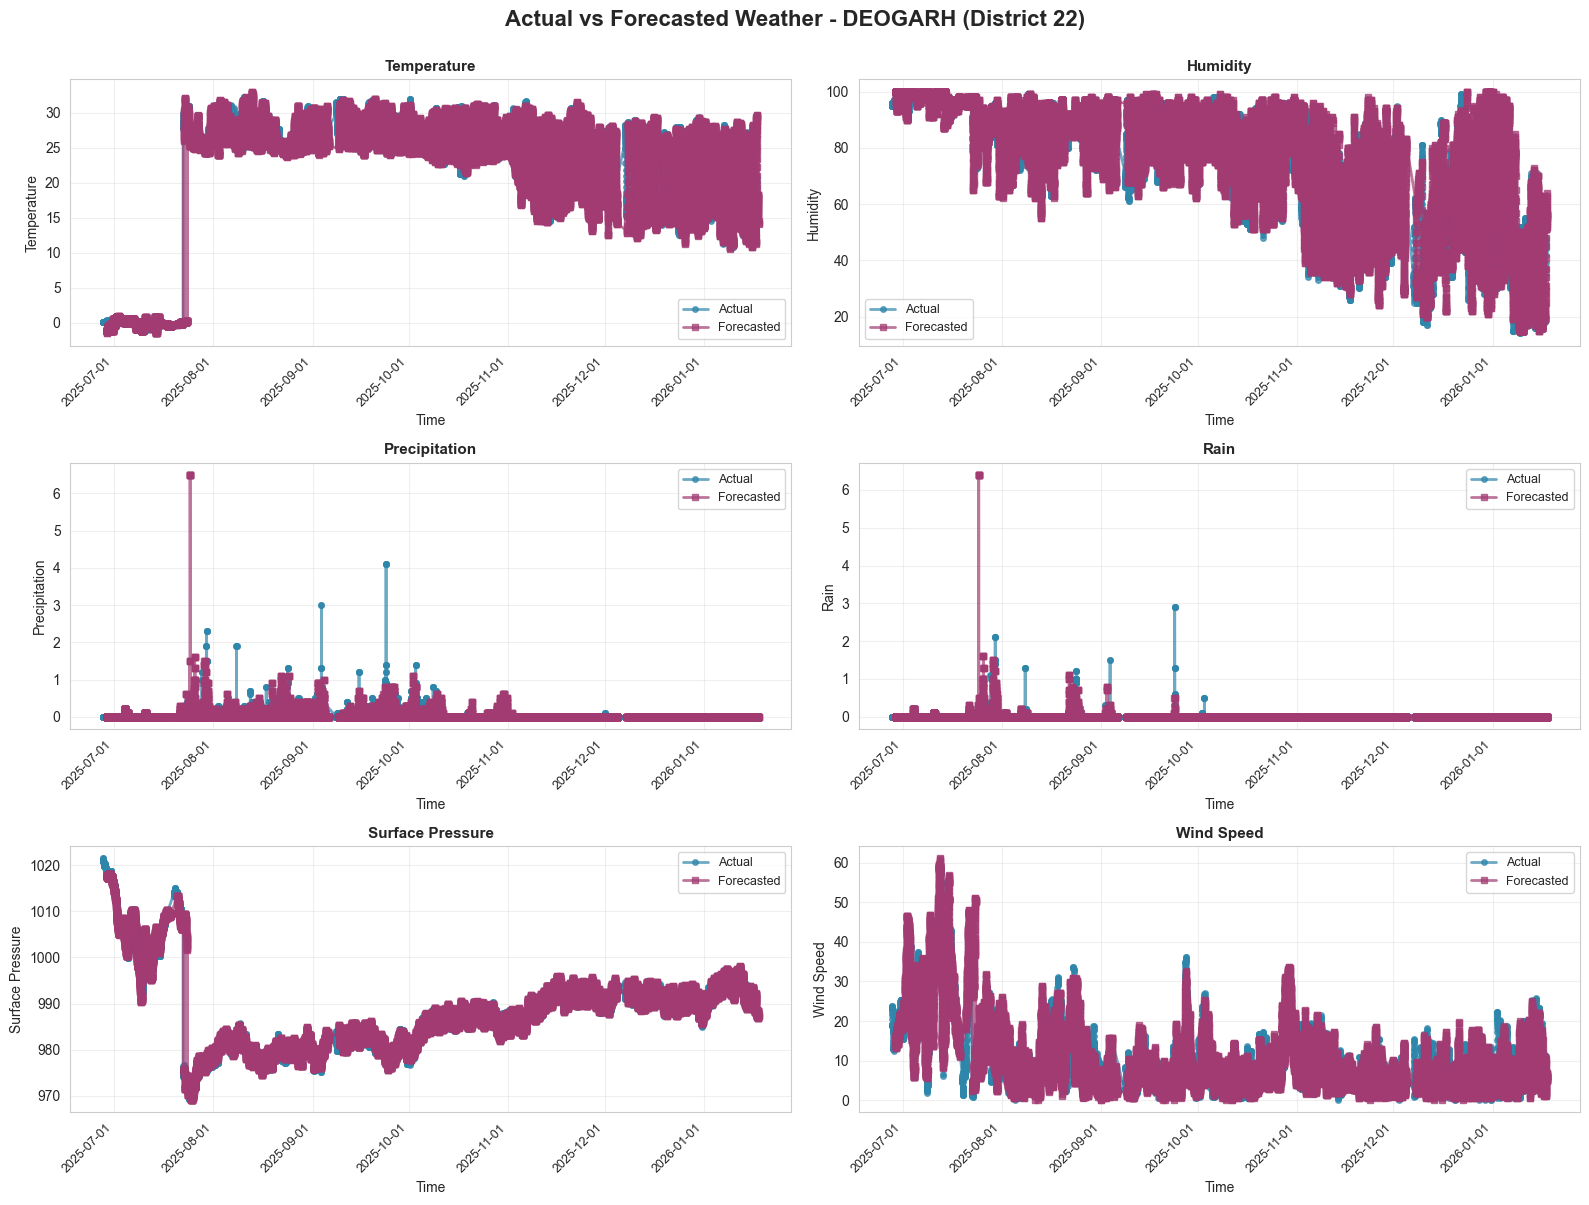

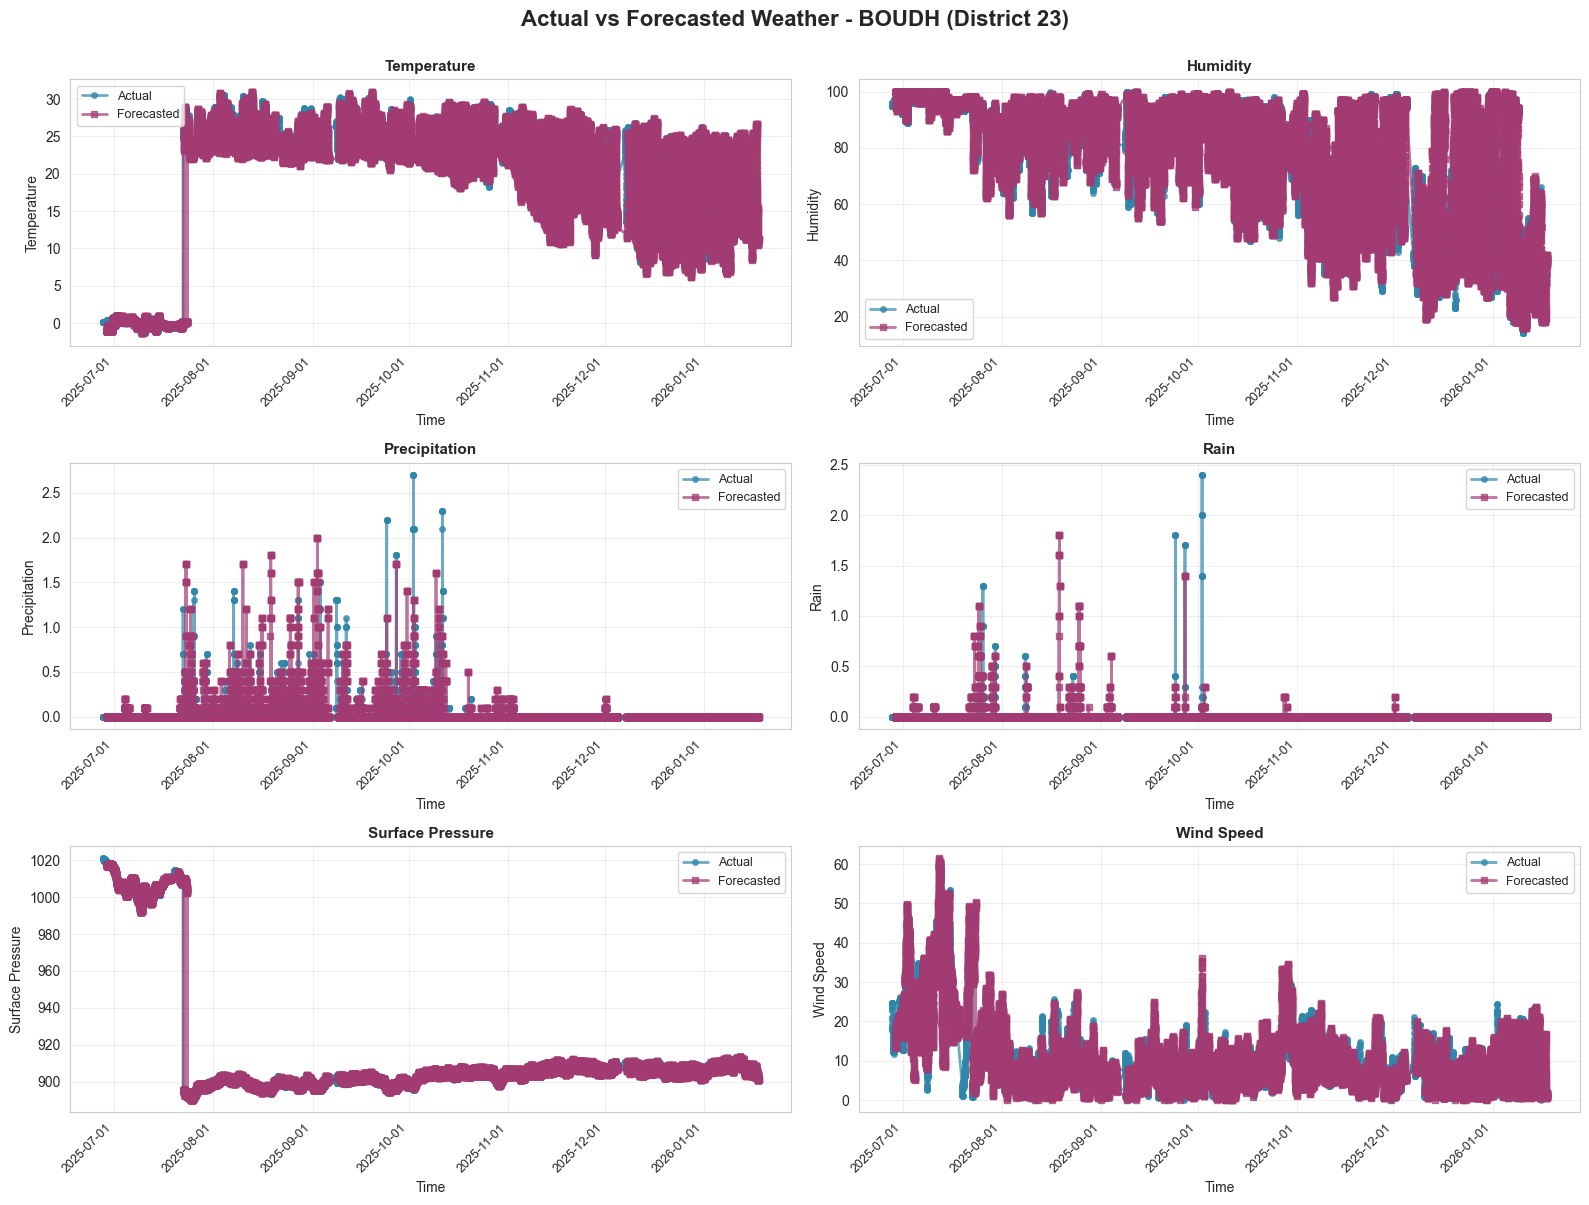

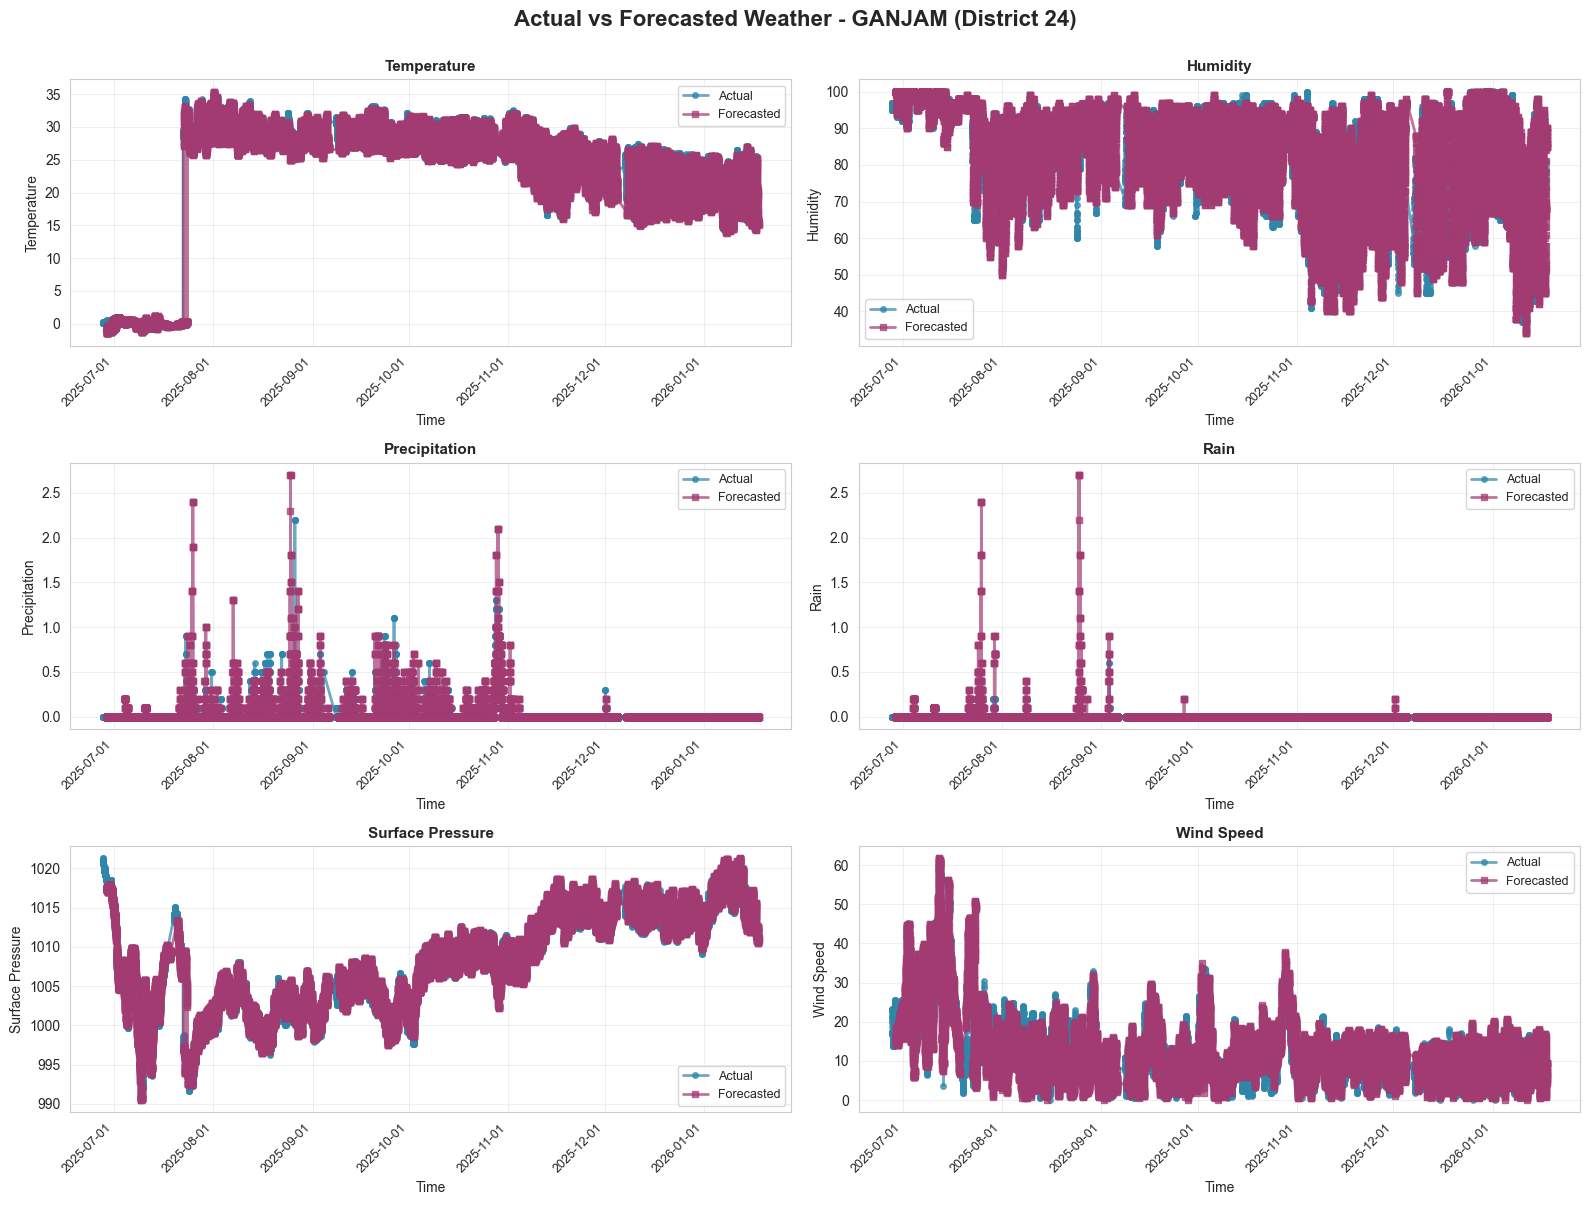

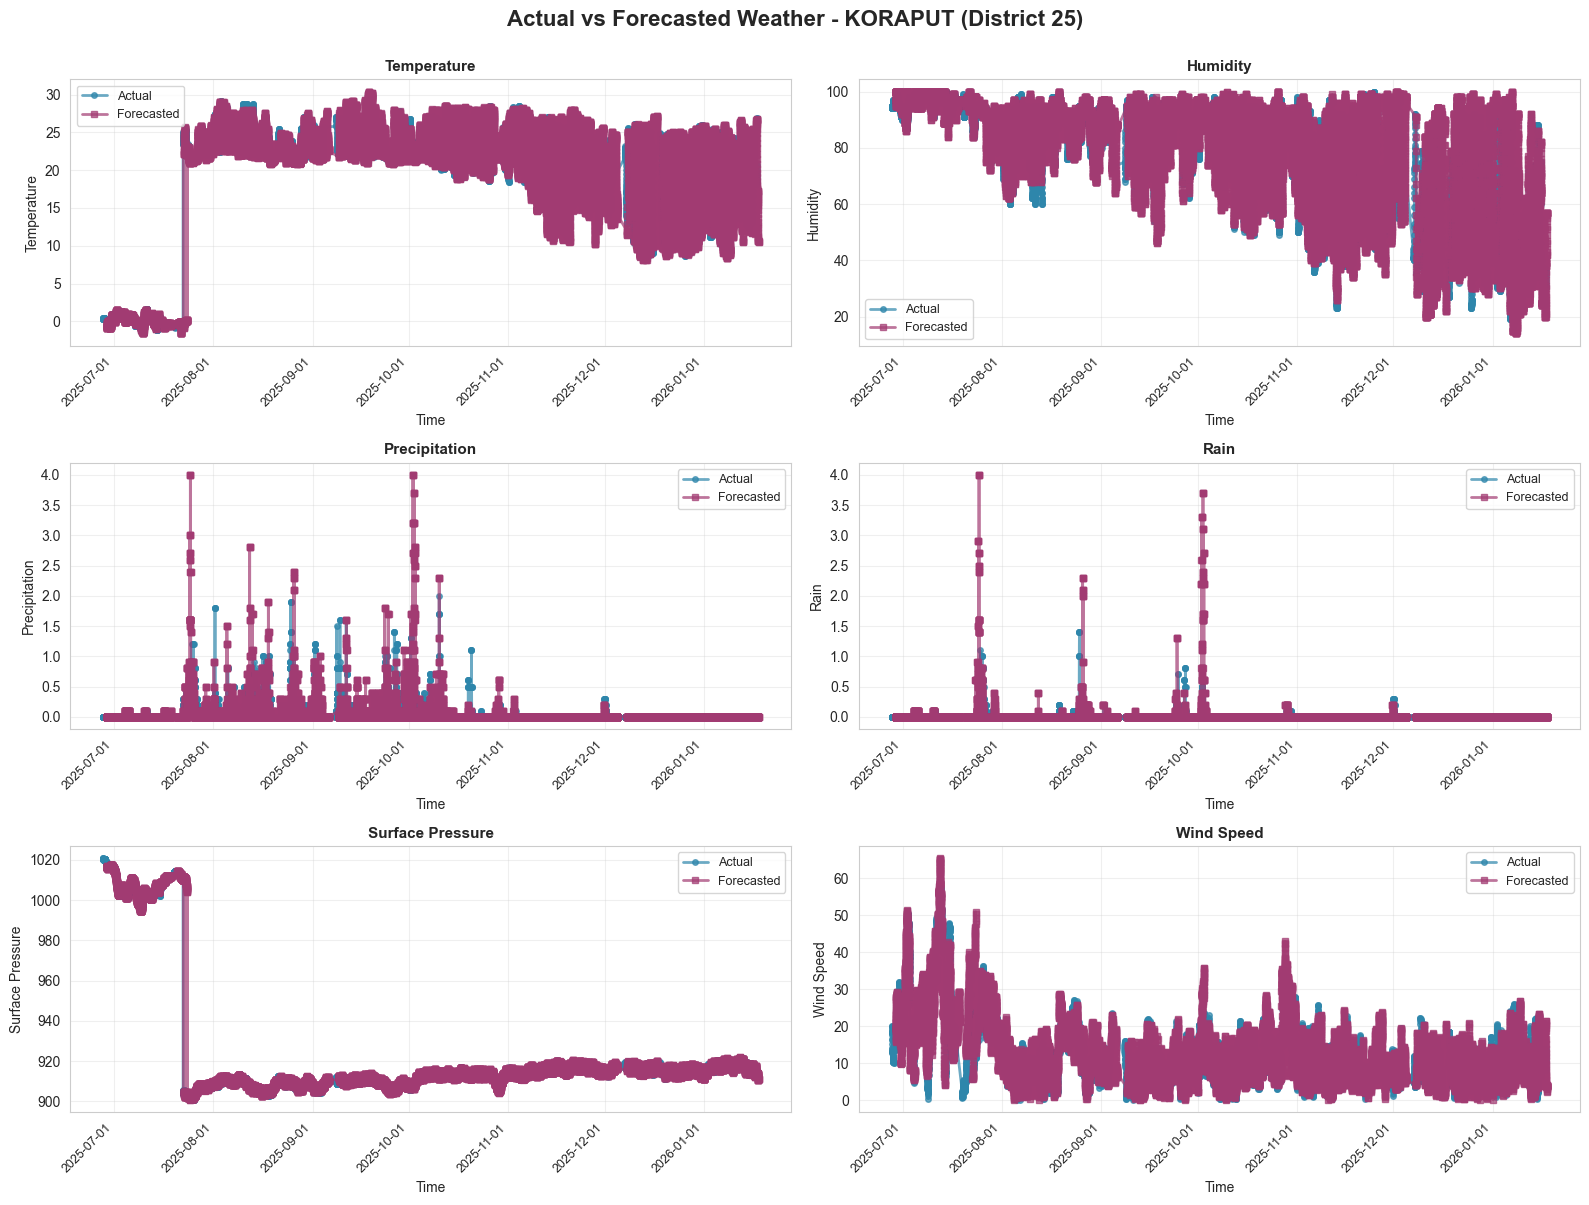

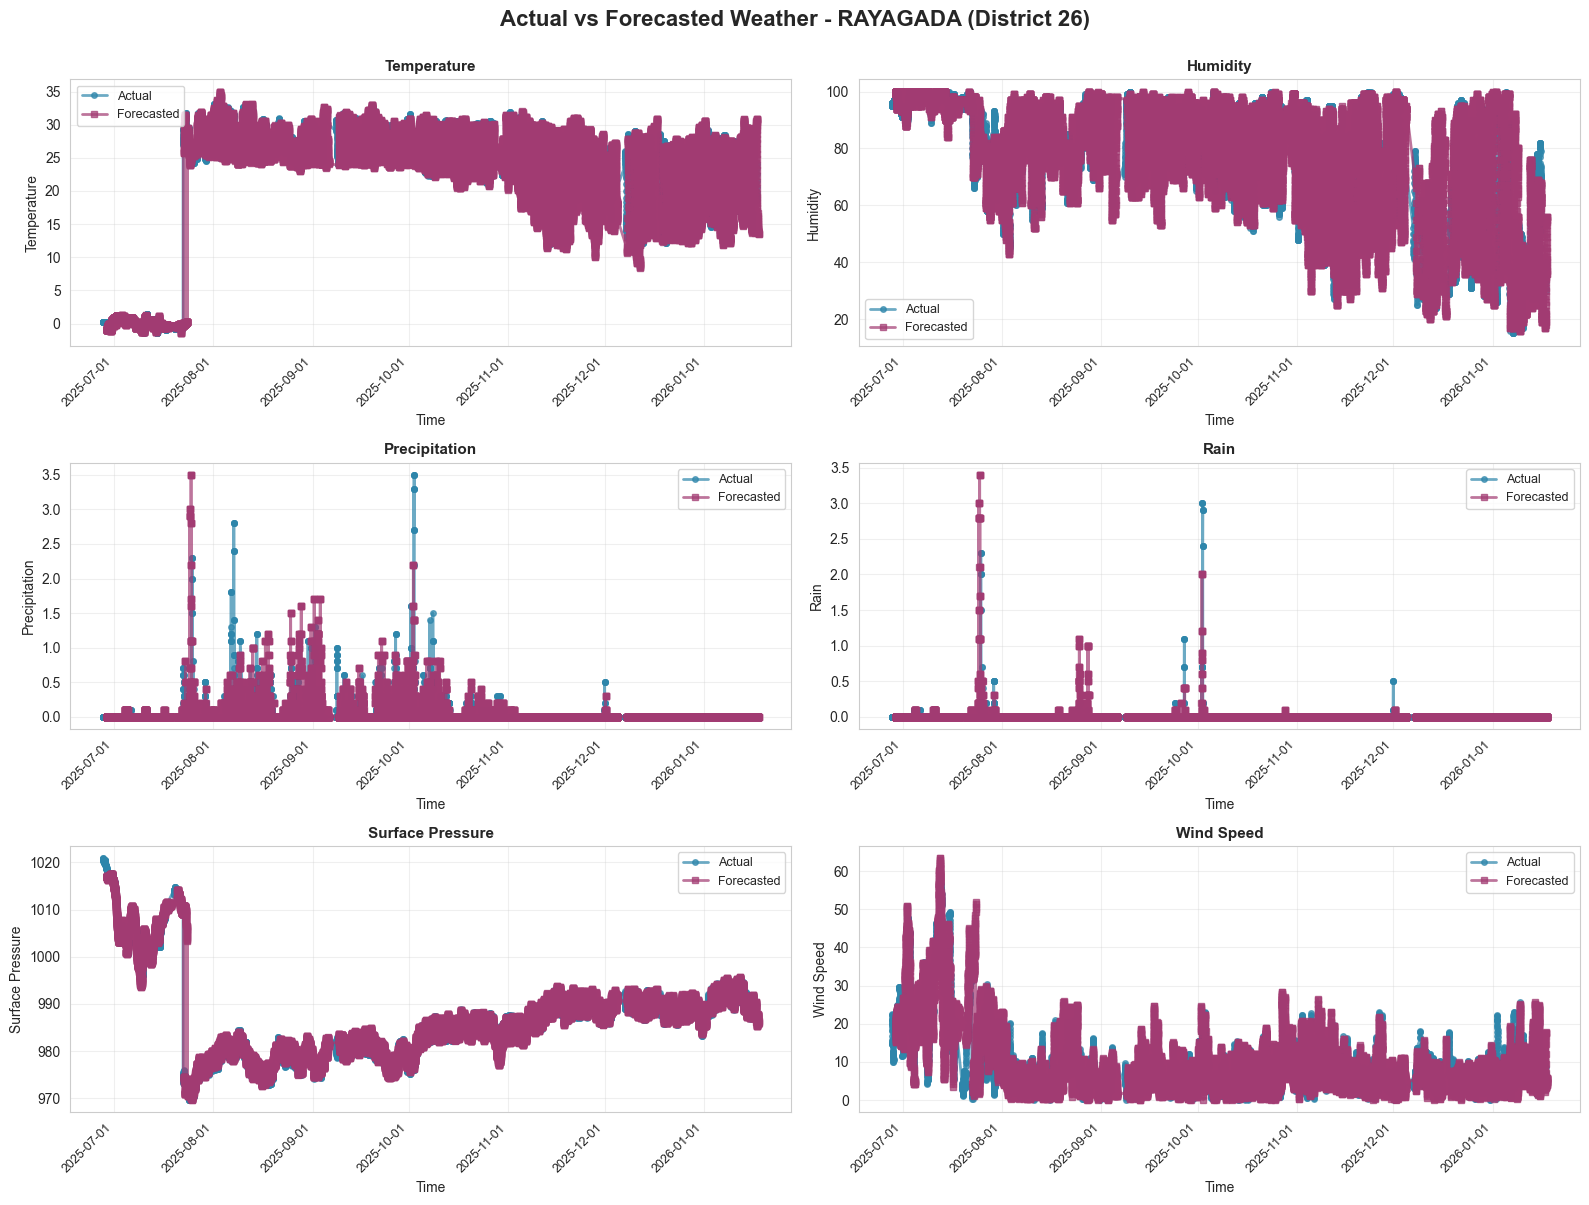

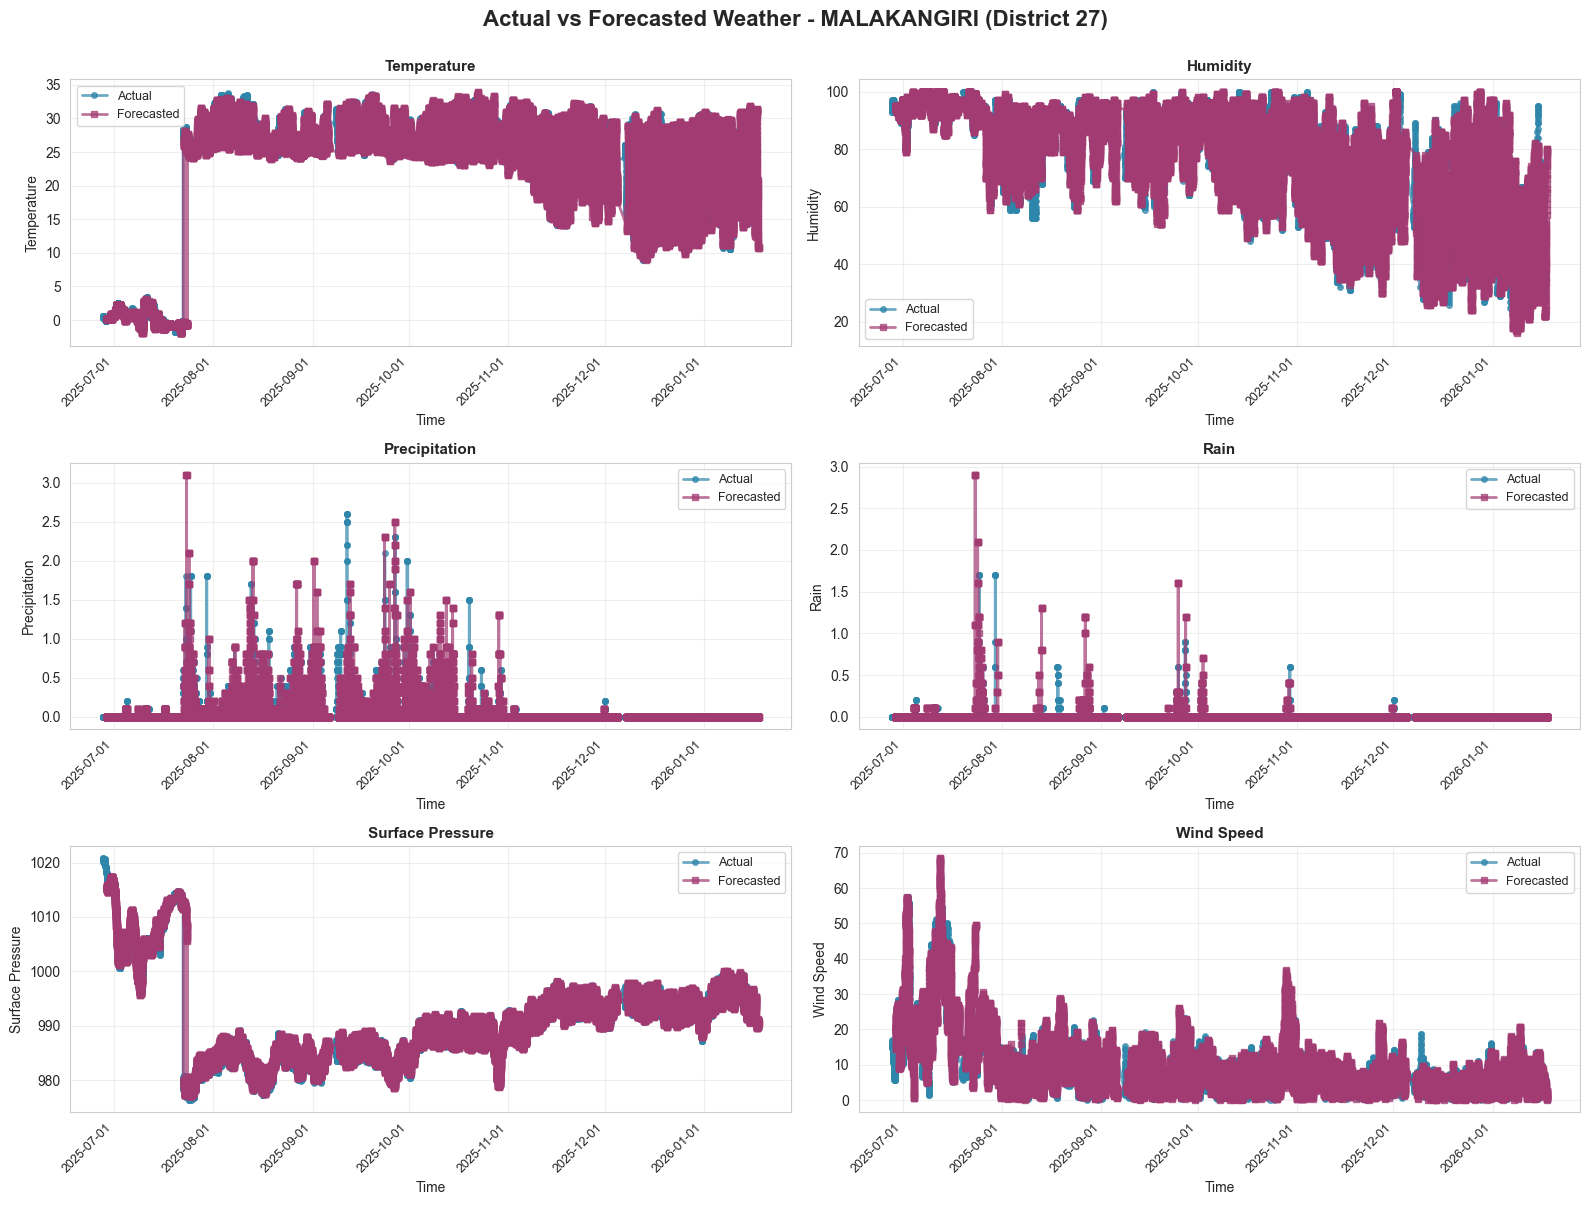

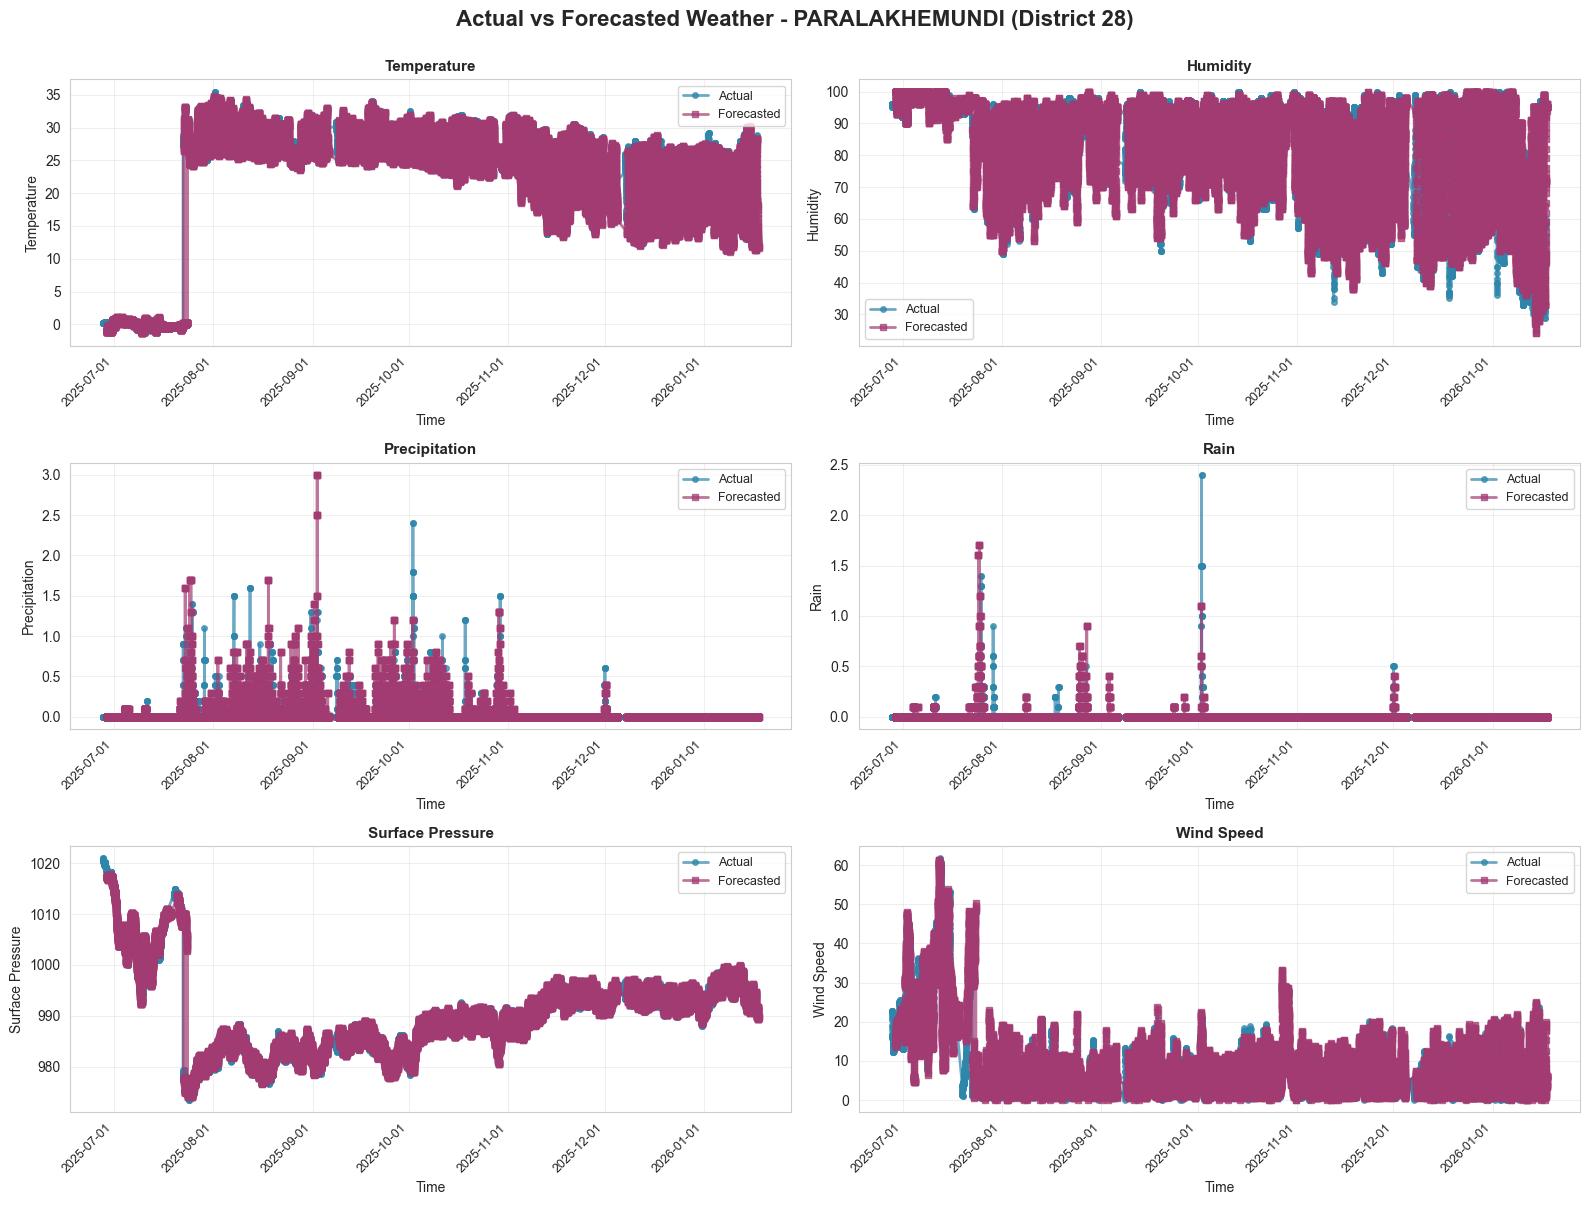

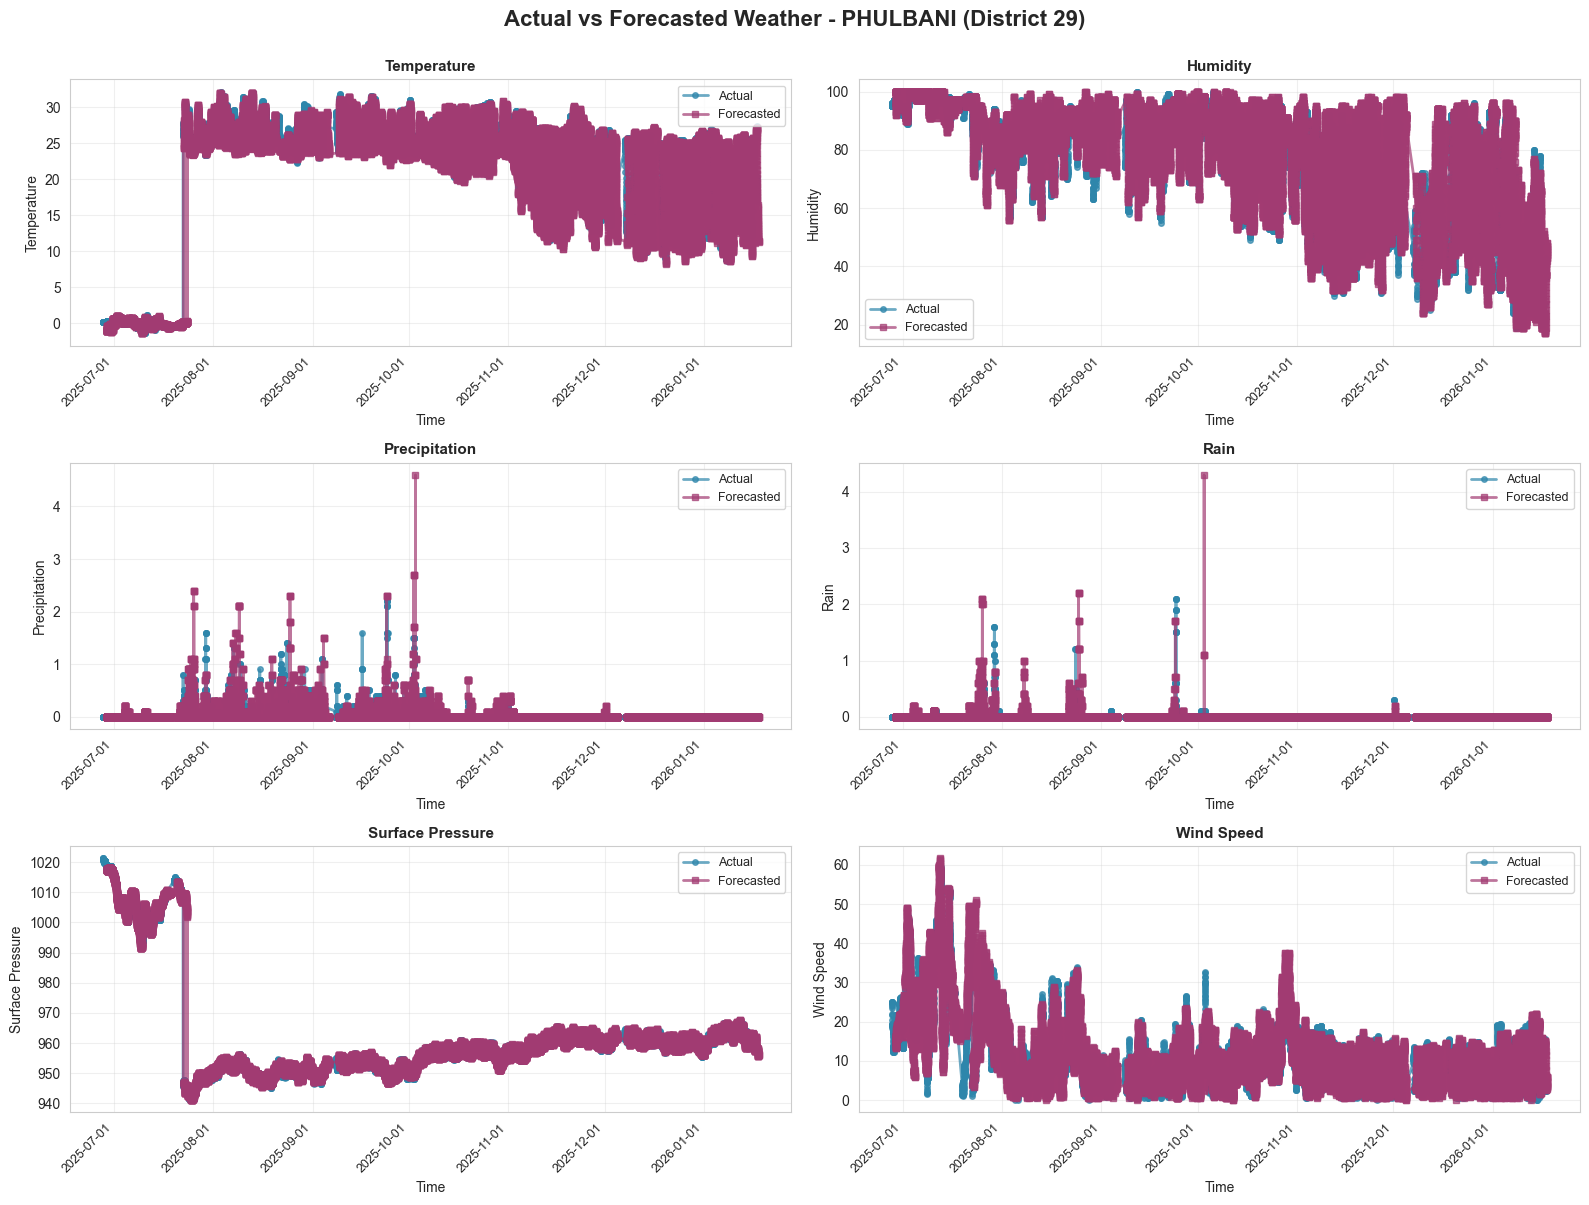

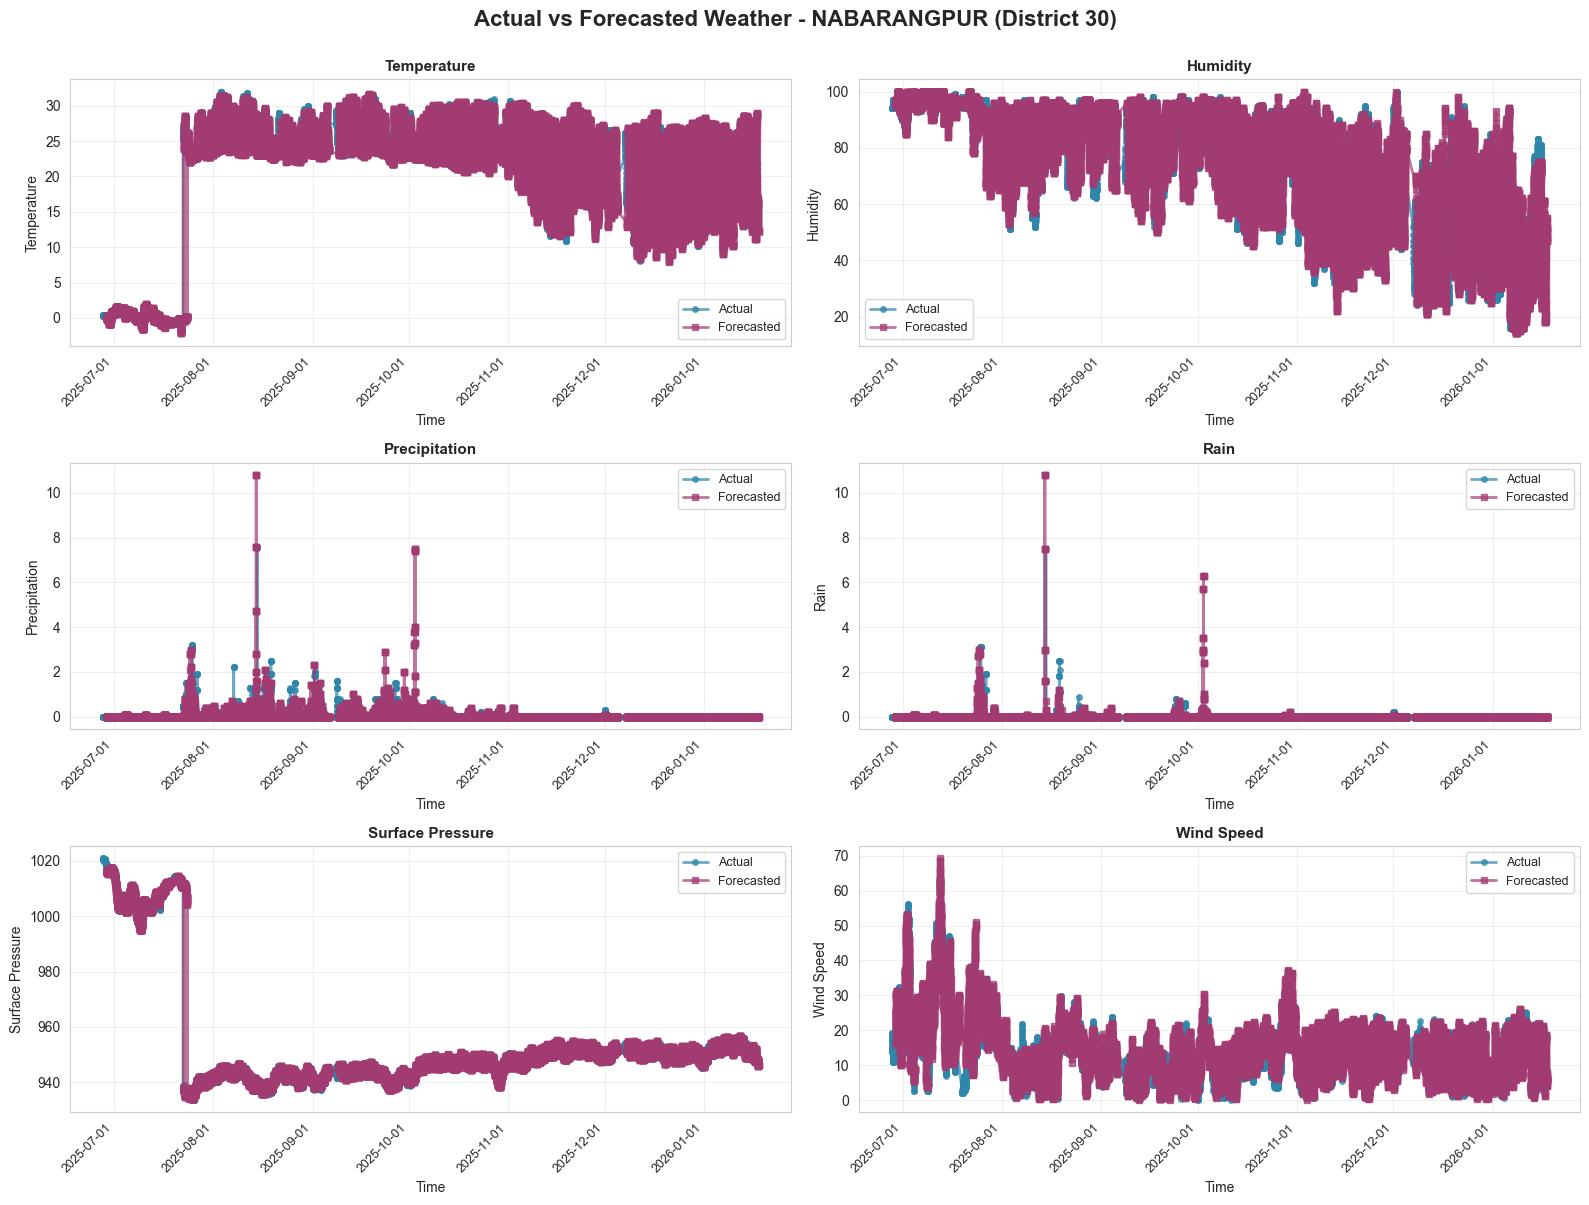


✓ Comparison plots created for all districts!


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

# Weather features to compare (common columns in actual and forecast)
weather_features = ['temperature', 'humidity', 'precipitation', 'rain', 'surface_pressure', 'wind_speed']

# Get all unique districts
districts = sorted(df_actual['district_id'].unique())

print(f"Comparing {len(weather_features)} weather features across {len(districts)} districts\n")

# Create comparison plots for each district
for district_id in districts:
    district_name = district_map.get(district_id, f"District {district_id}")
    
    # Filter data for this district
    actual_district = df_actual[df_actual['district_id'] == district_id].sort_values('time')
    forecast_district = df_forecast[df_forecast['district_id'] == district_id].sort_values('time')
    
    # Create subplots for each weather feature
    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle(f'Actual vs Forecasted Weather - {district_name} (District {district_id})', 
                 fontsize=16, fontweight='bold', y=1.00)
    
    axes = axes.flatten()
    
    for idx, feature in enumerate(weather_features):
        ax = axes[idx]
        
        if feature in actual_district.columns and feature in forecast_district.columns:
            # Plot actual data
            ax.plot(actual_district['time'], actual_district[feature], 
                   label='Actual', marker='o', linewidth=2, markersize=4, alpha=0.7, color='#2E86AB')
            
            # Plot forecast data
            ax.plot(forecast_district['time'], forecast_district[feature], 
                   label='Forecasted', marker='s', linewidth=2, markersize=4, alpha=0.7, color='#A23B72')
            
            ax.set_title(f'{feature.replace("_", " ").title()}', fontweight='bold', fontsize=11)
            ax.set_xlabel('Time', fontsize=10)
            ax.set_ylabel(feature.replace("_", " ").title(), fontsize=10)
            ax.legend(loc='best', fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Format x-axis dates
            ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=9)
        else:
            ax.text(0.5, 0.5, f'{feature} not available', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
print("\n✓ Comparison plots created for all districts!")


In [11]:
# Statistical Comparison: Actual vs Forecasted
print("=" * 80)
print("STATISTICAL COMPARISON: ACTUAL VS FORECASTED")
print("=" * 80)

comparison_stats = []

for feature in weather_features:
    if feature in df_actual.columns and feature in df_forecast.columns:
        actual_mean = df_actual[feature].mean()
        forecast_mean = df_forecast[feature].mean()
        actual_std = df_actual[feature].std()
        forecast_std = df_forecast[feature].std()
        
        mean_diff = abs(actual_mean - forecast_mean)
        mean_diff_pct = (mean_diff / actual_mean * 100) if actual_mean != 0 else 0
        
        comparison_stats.append({
            'Feature': feature.replace('_', ' ').title(),
            'Actual Mean': f"{actual_mean:.4f}",
            'Forecast Mean': f"{forecast_mean:.4f}",
            'Mean Difference (%)': f"{mean_diff_pct:.2f}%",
            'Actual Std': f"{actual_std:.4f}",
            'Forecast Std': f"{forecast_std:.4f}"
        })

comparison_df = pd.DataFrame(comparison_stats)
print("\n", comparison_df.to_string(index=False))
print("\n")


STATISTICAL COMPARISON: ACTUAL VS FORECASTED

          Feature Actual Mean Forecast Mean Mean Difference (%) Actual Std Forecast Std
     Temperature     21.4857       21.3189               0.78%     9.2127       9.1663
        Humidity     79.9154       79.9656               0.06%    17.2239      17.0873
   Precipitation      0.0430        0.0396               7.87%     0.1514       0.1498
            Rain      0.0063        0.0074              17.65%     0.0832       0.0918
Surface Pressure    988.2323      988.2098               0.00%    26.2865      26.1885
      Wind Speed     11.2749       11.3398               0.58%     8.7272       8.7352




In [12]:
# Detailed comparison per district with RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("=" * 100)
print("FORECAST ACCURACY METRICS BY DISTRICT")
print("=" * 100)

accuracy_results = []

for district_id in sorted(df_actual['district_id'].unique()):
    district_name = district_map.get(district_id, f"District {district_id}")
    
    actual_dist = df_actual[df_actual['district_id'] == district_id].sort_values('time')
    forecast_dist = df_forecast[df_forecast['district_id'] == district_id].sort_values('time')
    
    # Merge on time to get corresponding values
    merged = actual_dist[['time', 'temperature', 'humidity', 'precipitation']].merge(
        forecast_dist[['time', 'temperature', 'humidity', 'precipitation']], 
        on='time', suffixes=('_actual', '_forecast'), how='inner'
    )
    
    if len(merged) > 0:
        rmse_temp = np.sqrt(mean_squared_error(merged['temperature_actual'], merged['temperature_forecast']))
        mae_temp = mean_absolute_error(merged['temperature_actual'], merged['temperature_forecast'])
        
        rmse_humid = np.sqrt(mean_squared_error(merged['humidity_actual'], merged['humidity_forecast']))
        mae_humid = mean_absolute_error(merged['humidity_actual'], merged['humidity_forecast'])
        
        rmse_precip = np.sqrt(mean_squared_error(merged['precipitation_actual'], merged['precipitation_forecast']))
        mae_precip = mean_absolute_error(merged['precipitation_actual'], merged['precipitation_forecast'])
        
        accuracy_results.append({
            'District': district_name,
            'Temp RMSE': f"{rmse_temp:.4f}",
            'Temp MAE': f"{mae_temp:.4f}",
            'Humidity RMSE': f"{rmse_humid:.4f}",
            'Humidity MAE': f"{mae_humid:.4f}",
            'Precip RMSE': f"{rmse_precip:.4f}",
            'Precip MAE': f"{mae_precip:.4f}",
            'Matched Points': len(merged)
        })

accuracy_df = pd.DataFrame(accuracy_results)
print("\n", accuracy_df.to_string(index=False))
print("\n✓ Accuracy metrics calculated for all districts!")


FORECAST ACCURACY METRICS BY DISTRICT

       District Temp RMSE Temp MAE Humidity RMSE Humidity MAE Precip RMSE Precip MAE  Matched Points
      BALASORE    2.2910   0.8447        5.6484       3.7419      0.1605     0.0422           32329
       BHADRAK    2.3224   0.8416        6.0222       3.8734      0.1479     0.0484           32154
        JAJPUR    2.3108   0.8431        5.8498       3.8517      0.1529     0.0477           32192
      BARIPADA    2.2668   0.8222        5.3070       3.5685      0.2321     0.0603           32183
      KEONJHAR    2.1022   0.7848        6.0066       3.9662      0.1306     0.0369           32133
         ANGUL    2.3264   0.8771        6.2605       4.1298      0.1611     0.0527           32135
          PURI    2.2708   0.8058        6.0554       4.0558      0.1324     0.0490           32107
       KHORDHA    2.2890   0.8662        6.3567       4.1337      0.1354     0.0455           32206
       CUTTACK    2.2845   0.8503        5.9324       3.9517